In [3]:
import random
import spacy
import string
import pickle as pkl
import numpy as np
from collections import Counter
from nltk.corpus import stopwords


/home/yves/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/yves/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/yves/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
tokenizer = spacy.load('en_core_web_sm')
punctuations = string.punctuation

# lowercase and remove punctuation
def tokenize(sent):
    tokens = tokenizer(sent)
    #return [token.text.lower() for token in tokens if (token.text not in punctuations)]
    return [token.text.lower() for token in tokens if (token.text not in punctuations) and (token.text not in stopwords.words('english'))]


def tokenize_dataset(dataset):
    token_dataset = []
    # we are keeping track of all tokens in dataset 
    # in order to create vocabulary later
    all_tokens = []
    
    for sample in dataset:
        tokens = tokenize(sample)
        token_dataset.append(tokens)
        all_tokens += tokens

    return token_dataset, all_tokens

def n_gram2(sent):
    n_gram = []
    for i in range(len(sent) - 1):
        n_gram.append(sent[i] + " " + sent[i+1])
    return n_gram

def n_gram3(sent):
    n_gram = []
    for i in range(len(sent) - 2):
        n_gram.append(sent[i] + " " + sent[i+1] + " " + sent[i+2])
    return n_gram

def n_gram4(sent):
    n_gram = []
    for i in range(len(sent) - 3):
        n_gram.append(sent[i] + " " + sent[i+1] + " " + sent[i+2] + " " + sent[i+3])
    return n_gram
    
# Example
tokens = tokenize(u'Apple is looking at buying U.K. startup for $1 billion')
#print (tokens)
#print(n_gram2(tokens))
#print(n_gram3(tokens))
#print(n_gram4(tokens))

In [20]:
import glob
trainpos = './aclImdb/train/pos/'
trainneg = './aclImdb/train/neg/'
tsetpos = './aclImdb/test/pos/'
testneg = './aclImdb/test/neg/'

pos1 = []
pos2 = []
pos3 = []
pos4 = []

for filename in glob.glob(trainpos+'*.txt'):
    text_file = open(filename, "r")
    lines = text_file.readlines()[0]
    tokens = tokenize(lines)
    pos1.append(tokens)
    pos2.append(n_gram2(tokens))
    pos3.append(n_gram3(tokens))
    pos4.append(n_gram4(tokens))

pkl.dump(pos1, open("train_pos1_tokens.p", "wb"))
pkl.dump(pos2, open("train_pos2_tokens.p", "wb"))
pkl.dump(pos3, open("train_pos3_tokens.p", "wb"))
pkl.dump(pos4, open("train_pos4_tokens.p", "wb"))

In [21]:
neg1 = []
neg2 = []
neg3 = []
neg4 = []

for filename in glob.glob(trainneg+'*.txt'):
    text_file = open(filename, "r")
    lines = text_file.readlines()[0]
    tokens = tokenize(lines)
    neg1.append(tokens)
    neg2.append(n_gram2(tokens))
    neg3.append(n_gram3(tokens))
    neg4.append(n_gram4(tokens))

pkl.dump(neg1, open("train_neg1_tokens.p", "wb"))
pkl.dump(neg2, open("train_neg2_tokens.p", "wb"))
pkl.dump(neg3, open("train_neg3_tokens.p", "wb"))
pkl.dump(neg4, open("train_neg4_tokens.p", "wb"))
    
test_pos1 = []
test_pos2 = []
test_pos3 = []
test_pos4 = []

for filename in glob.glob(tsetpos+'*.txt'):
    text_file = open(filename, "r")
    lines = text_file.readlines()[0]
    tokens = tokenize(lines)
    test_pos1.append(tokens)
    test_pos2.append(n_gram2(tokens))
    test_pos3.append(n_gram3(tokens))
    test_pos4.append(n_gram4(tokens))

pkl.dump(test_pos1, open("test_pos1_tokens.p", "wb"))
pkl.dump(test_pos2, open("test_pos2_tokens.p", "wb"))
pkl.dump(test_pos3, open("test_pos3_tokens.p", "wb"))
pkl.dump(test_pos4, open("test_pos4_tokens.p", "wb"))

test_neg1 = []
test_neg2 = []
test_neg3 = []
test_neg4 = []

for filename in glob.glob(testneg+'*.txt'):
    text_file = open(filename, "r")
    lines = text_file.readlines()[0]
    tokens = tokenize(lines)
    test_neg1.append(tokens)
    test_neg2.append(n_gram2(tokens))
    test_neg3.append(n_gram3(tokens))
    test_neg4.append(n_gram4(tokens))

pkl.dump(test_neg1, open("test_neg1_tokens.p", "wb"))
pkl.dump(test_neg2, open("test_neg2_tokens.p", "wb"))
pkl.dump(test_neg3, open("test_neg3_tokens.p", "wb"))
pkl.dump(test_neg4, open("test_neg4_tokens.p", "wb"))

In [87]:
import glob
trainpos = './aclImdb/train/pos/'
trainneg = './aclImdb/train/neg/'
tsetpos = './aclImdb/test/pos/'
testneg = './aclImdb/test/neg/'

pos1 = []
pos2 = []
pos3 = []
pos4 = []

for filename in glob.glob(trainpos+'*.txt'):
    text_file = open(filename, "r")
    lines = text_file.readlines()[0]
    tokens = tokenize(lines)
    pos1.append(tokens)
    pos2.append(n_gram2(tokens))
    pos3.append(n_gram3(tokens))
    pos4.append(n_gram4(tokens))

pkl.dump(pos1, open("./rmstop/train_pos1_tokens.p", "wb"))
pkl.dump(pos2, open("./rmstop/train_pos2_tokens.p", "wb"))
pkl.dump(pos3, open("./rmstop/train_pos3_tokens.p", "wb"))
pkl.dump(pos4, open("./rmstop/train_pos4_tokens.p", "wb"))

neg1 = []
neg2 = []
neg3 = []
neg4 = []

for filename in glob.glob(trainneg+'*.txt'):
    text_file = open(filename, "r")
    lines = text_file.readlines()[0]
    tokens = tokenize(lines)
    neg1.append(tokens)
    neg2.append(n_gram2(tokens))
    neg3.append(n_gram3(tokens))
    neg4.append(n_gram4(tokens))

pkl.dump(neg1, open("./rmstop/train_neg1_tokens.p", "wb"))
pkl.dump(neg2, open("./rmstop/train_neg2_tokens.p", "wb"))
pkl.dump(neg3, open("./rmstop/train_neg3_tokens.p", "wb"))
pkl.dump(neg4, open("./rmstop/train_neg4_tokens.p", "wb"))
    
test_pos1 = []
test_pos2 = []
test_pos3 = []
test_pos4 = []

for filename in glob.glob(tsetpos+'*.txt'):
    text_file = open(filename, "r")
    lines = text_file.readlines()[0]
    tokens = tokenize(lines)
    test_pos1.append(tokens)
    test_pos2.append(n_gram2(tokens))
    test_pos3.append(n_gram3(tokens))
    test_pos4.append(n_gram4(tokens))

pkl.dump(test_pos1, open("./rmstop/test_pos1_tokens.p", "wb"))
pkl.dump(test_pos2, open("./rmstop/test_pos2_tokens.p", "wb"))
pkl.dump(test_pos3, open("./rmstop/test_pos3_tokens.p", "wb"))
pkl.dump(test_pos4, open("./rmstop/test_pos4_tokens.p", "wb"))

test_neg1 = []
test_neg2 = []
test_neg3 = []
test_neg4 = []

for filename in glob.glob(testneg+'*.txt'):
    text_file = open(filename, "r")
    lines = text_file.readlines()[0]
    tokens = tokenize(lines)
    test_neg1.append(tokens)
    test_neg2.append(n_gram2(tokens))
    test_neg3.append(n_gram3(tokens))
    test_neg4.append(n_gram4(tokens))

pkl.dump(test_neg1, open("./rmstop/test_neg1_tokens.p", "wb"))
pkl.dump(test_neg2, open("./rmstop/test_neg2_tokens.p", "wb"))
pkl.dump(test_neg3, open("./rmstop/test_neg3_tokens.p", "wb"))
pkl.dump(test_neg4, open("./rmstop/test_neg4_tokens.p", "wb"))

In [167]:
train_pos1_tokens = pkl.load(open("train_pos1_tokens.p", "rb"))
train_neg1_tokens = pkl.load(open("train_neg1_tokens.p", "rb"))
test_pos1_tokens = pkl.load(open("test_pos1_tokens.p", "rb"))
test_neg1_tokens = pkl.load(open("test_neg1_tokens.p", "rb"))

In [168]:
index = np.arange(12500)
np.random.seed(1234)
np.random.shuffle(index)
pos_index = index.copy()
np.random.seed(2234)
np.random.shuffle(index)
neg_index = index.copy()

In [211]:
train_pos = [train_pos1_tokens[i] for i in pos_index[:10000]]
val_pos = [train_pos1_tokens[i] for i in pos_index[10000:]]
train_neg = [train_neg1_tokens[i] for i in neg_index[:10000]]
val_neg = [train_neg1_tokens[i] for i in neg_index[10000:]]

In [212]:
train_targets = [1]*10000+[0]*10000
val_targets = [1]*2500+[0]*2500
test_targets = [1]*12500+[0]*12500

train_data_tokens = train_pos + train_neg
val_data_tokens = val_pos + val_neg
test_data_tokens = test_pos1_tokens + test_neg1_tokens

print ("Train dataset size is {}".format(len(train_data_tokens)))
print ("Val dataset size is {}".format(len(val_data_tokens)))
print ("Test dataset size is {}".format(len(test_data_tokens)))

Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000


In [6]:
all_train_tokens = []
for tokens in train_data_tokens:
    all_train_tokens += tokens

In [7]:
from collections import Counter

max_vocab_size = 10000
# save index 0 for unk and 1 for pad
PAD_IDX = 0
UNK_IDX = 1

def build_vocab(all_tokens):
    # Returns:
    # id2token: list of tokens, where id2token[i] returns token that corresponds to token i
    # token2id: dictionary where keys represent tokens and corresponding values represent indices
    token_counter = Counter(all_tokens)
    vocab, count = zip(*token_counter.most_common(max_vocab_size))
    id2token = list(vocab)
    token2id = dict(zip(vocab, range(2,2+len(vocab)))) 
    id2token = ['<pad>', '<unk>'] + id2token
    token2id['<pad>'] = PAD_IDX 
    token2id['<unk>'] = UNK_IDX
    return token2id, id2token

token2id, id2token = build_vocab(all_train_tokens)

In [8]:
# Lets check the dictionary by loading random token from it

random_token_id = random.randint(0, len(id2token)-1)
random_token = id2token[random_token_id]

print ("Token id {} ; token {}".format(random_token_id, id2token[random_token_id]))
print ("Token {}; token id {}".format(random_token, token2id[random_token]))

Token id 2351 ; token steals
Token steals; token id 2351


In [9]:
# convert token to id in the dataset
def token2index_dataset(tokens_data):
    indices_data = []
    for tokens in tokens_data:
        index_list = [token2id[token] if token in token2id else UNK_IDX for token in tokens]
        indices_data.append(index_list)
    return indices_data

train_data_indices = token2index_dataset(train_data_tokens)
val_data_indices = token2index_dataset(val_data_tokens)
test_data_indices = token2index_dataset(test_data_tokens)

# double checking
print ("Train dataset size is {}".format(len(train_data_indices)))
print ("Val dataset size is {}".format(len(val_data_indices)))
print ("Test dataset size is {}".format(len(test_data_indices)))

Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000


In [3]:
def datagenerater(train_pos,train_neg,test_pos,test_neg,max_vocab_size = 10000):
    
    train_pos1_tokens = pkl.load(open(train_pos, "rb"))
    train_neg1_tokens = pkl.load(open(train_neg, "rb"))
    test_pos1_tokens = pkl.load(open(test_pos, "rb"))
    test_neg1_tokens = pkl.load(open(test_neg, "rb"))
    
    index = np.arange(12500)
    np.random.seed(1234)
    np.random.shuffle(index)
    pos_index = index.copy()
    np.random.seed(2234)
    np.random.shuffle(index)
    neg_index = index.copy()
    
    train_pos = [train_pos1_tokens[i] for i in pos_index[:10000]]
    val_pos = [train_pos1_tokens[i] for i in pos_index[10000:]]
    train_neg = [train_neg1_tokens[i] for i in neg_index[:10000]]
    val_neg = [train_neg1_tokens[i] for i in neg_index[10000:]]
    
    train_targets = [1]*10000+[0]*10000
    val_targets = [1]*2500+[0]*2500
    test_targets = [1]*12500+[0]*12500

    train_data_tokens = train_pos + train_neg
    val_data_tokens = val_pos + val_neg
    test_data_tokens = test_pos1_tokens + test_neg1_tokens

    print ("Train dataset size is {}".format(len(train_data_tokens)))
    print ("Val dataset size is {}".format(len(val_data_tokens)))
    print ("Test dataset size is {}".format(len(test_data_tokens)))
    
    all_train_tokens = []
    for tokens in train_data_tokens:
        all_train_tokens += tokens
    
    
    # save index 0 for unk and 1 for pad
    PAD_IDX = 0
    UNK_IDX = 1

    def build_vocab(all_tokens):
        # Returns:
        # id2token: list of tokens, where id2token[i] returns token that corresponds to token i
        # token2id: dictionary where keys represent tokens and corresponding values represent indices
        token_counter = Counter(all_tokens)
        vocab, count = zip(*token_counter.most_common(max_vocab_size))
        id2token = list(vocab)
        token2id = dict(zip(vocab, range(2,2+len(vocab)))) 
        id2token = ['<pad>', '<unk>'] + id2token
        token2id['<pad>'] = PAD_IDX 
        token2id['<unk>'] = UNK_IDX
        return token2id, id2token

    token2id, id2token = build_vocab(all_train_tokens)
    
    # Lets check the dictionary by loading random token from it
    random_token_id = random.randint(0, len(id2token)-1)
    random_token = id2token[random_token_id]

    print ("Token id {} ; token {}".format(random_token_id, id2token[random_token_id]))
    print ("Token {}; token id {}".format(random_token, token2id[random_token]))
    
    def token2index_dataset(tokens_data):
        indices_data = []
        for tokens in tokens_data:
            index_list = [token2id[token] if token in token2id else UNK_IDX for token in tokens]
            indices_data.append(index_list)
        return indices_data
    
    train_data_indices = token2index_dataset(train_data_tokens)
    val_data_indices = token2index_dataset(val_data_tokens)
    test_data_indices = token2index_dataset(test_data_tokens)
    
    print ("Train dataset size is {}".format(len(train_data_indices)))
    print ("Val dataset size is {}".format(len(val_data_indices)))
    print ("Test dataset size is {}".format(len(test_data_indices)))
    
    return train_data_indices,val_data_indices,test_data_indices,token2id,id2token

In [4]:
MAX_SENTENCE_LENGTH = 200

import numpy as np
import torch
from torch.utils.data import Dataset

class NewsGroupDataset(Dataset):
    """
    Class that represents a train/validation/test dataset that's readable for PyTorch
    Note that this class inherits torch.utils.data.Dataset
    """
    
    def __init__(self, data_list, target_list):
        """
        @param data_list: list of newsgroup tokens 
        @param target_list: list of newsgroup targets 

        """
        self.data_list = data_list
        self.target_list = target_list
        assert (len(self.data_list) == len(self.target_list))

    def __len__(self):
        return len(self.data_list)
        
    def __getitem__(self, key):
        """
        Triggered when you call dataset[i]
        """
        
        token_idx = self.data_list[key][:MAX_SENTENCE_LENGTH]
        label = self.target_list[key]
        return [token_idx, len(token_idx), label]

def newsgroup_collate_func(batch):
    """
    Customized function for DataLoader that dynamically pads the batch so that all 
    data have the same length
    """
    data_list = []
    label_list = []
    length_list = []
    #print("collate batch: ", batch[0][0])
    #batch[0][0] = batch[0][0][:MAX_SENTENCE_LENGTH]
    for datum in batch:
        label_list.append(datum[2])
        length_list.append(datum[1])
    # padding
    for datum in batch:
        padded_vec = np.pad(np.array(datum[0]), 
                                pad_width=((0,MAX_SENTENCE_LENGTH-datum[1])), 
                                mode="constant", constant_values=0)
        data_list.append(padded_vec)
    return [torch.from_numpy(np.array(data_list)), torch.LongTensor(length_list), torch.LongTensor(label_list)]

# create pytorch dataloader
#train_loader = NewsGroupDataset(train_data_indices, train_targets)
#val_loader = NewsGroupDataset(val_data_indices, val_targets)
#test_loader = NewsGroupDataset(test_data_indices, test_targets)

# BATCH_SIZE = 32
# train_dataset = NewsGroupDataset(train_data_indices, train_targets)
# train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
#                                            batch_size=BATCH_SIZE,
#                                            collate_fn=newsgroup_collate_func,
#                                            shuffle=True)

# val_dataset = NewsGroupDataset(val_data_indices, val_targets)
# val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
#                                            batch_size=BATCH_SIZE,
#                                            collate_fn=newsgroup_collate_func,
#                                            shuffle=True)

# test_dataset = NewsGroupDataset(test_data_indices, test_targets)
# test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
#                                            batch_size=BATCH_SIZE,
#                                            collate_fn=newsgroup_collate_func,
#                                            shuffle=False)

#for i, (data, lengths, labels) in enumerate(train_loader):
#    print (data)
#    print (labels)
#    break

In [5]:
# First import torch related libraries
import torch
import torch.nn as nn
import torch.nn.functional as F

class BagOfWords(nn.Module):
    """
    BagOfWords classification model
    """
    def __init__(self, vocab_size, emb_dim):
        """
        @param vocab_size: size of the vocabulary. 
        @param emb_dim: size of the word embedding
        """
        super(BagOfWords, self).__init__()
        # pay attention to padding_idx 
        self.embed = nn.Embedding(vocab_size, emb_dim, padding_idx=0)
        self.linear = nn.Linear(emb_dim,2)
    
    def forward(self, data, length):
        """
        
        @param data: matrix of size (batch_size, max_sentence_length). Each row in data represents a 
            review that is represented using n-gram index. Note that they are padded to have same length.
        @param length: an int tensor of size (batch_size), which represents the non-trivial (excludes padding)
            length of each sentences in the data.
        """
        out = self.embed(data)
        out = torch.sum(out, dim=1)
        out /= length.view(length.size()[0],1).expand_as(out).float()
     
        # return logits
        out = self.linear(out.float())
        return out

# emb_dim = 100
# model = BagOfWords(len(id2token), emb_dim)

In [100]:
learning_rate = 0.01
num_epochs = 3 # number epoch to train

model = BagOfWords(len(id2token), emb_dim)

# Criterion and Optimizer
criterion = torch.nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Function for testing the model
def test_model(loader, model):
    """
    Help function that tests the model's performance on a dataset
    @param: loader - data loader for the dataset to test against
    """
    correct = 0
    total = 0
    model.eval()
    for data, lengths, labels in loader:
        data_batch, length_batch, label_batch = data, lengths, labels
        outputs = F.softmax(model(data_batch, length_batch), dim=1)
        predicted = outputs.max(1, keepdim=True)[1]
        
        total += labels.size(0)
        correct += predicted.eq(labels.view_as(predicted)).sum().item()
    return (100 * correct / total)

for epoch in range(num_epochs):
    for i, (data, lengths, labels) in enumerate(train_loader):
        model.train()
        data_batch, length_batch, label_batch = data, lengths, labels
        optimizer.zero_grad()
        outputs = model(data_batch, length_batch)
        loss = criterion(outputs, label_batch)
        loss.backward()
        optimizer.step()
        # validate every 100 iterations
        if i > 0 and i % 100 == 0:
            # validate
            val_acc = test_model(val_loader, model)
            print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
                       epoch+1, num_epochs, i+1, len(train_loader), val_acc))

Epoch: [1/3], Step: [101/625], Validation Acc: 75.82
Epoch: [1/3], Step: [201/625], Validation Acc: 83.88
Epoch: [1/3], Step: [301/625], Validation Acc: 85.02
Epoch: [1/3], Step: [401/625], Validation Acc: 86.68
Epoch: [1/3], Step: [501/625], Validation Acc: 86.96
Epoch: [1/3], Step: [601/625], Validation Acc: 87.54
Epoch: [2/3], Step: [101/625], Validation Acc: 87.28
Epoch: [2/3], Step: [201/625], Validation Acc: 87.56
Epoch: [2/3], Step: [301/625], Validation Acc: 87.24
Epoch: [2/3], Step: [401/625], Validation Acc: 87.08
Epoch: [2/3], Step: [501/625], Validation Acc: 87.18
Epoch: [2/3], Step: [601/625], Validation Acc: 87.46
Epoch: [3/3], Step: [101/625], Validation Acc: 86.9
Epoch: [3/3], Step: [201/625], Validation Acc: 87.2
Epoch: [3/3], Step: [301/625], Validation Acc: 86.96
Epoch: [3/3], Step: [401/625], Validation Acc: 86.62
Epoch: [3/3], Step: [501/625], Validation Acc: 85.46
Epoch: [3/3], Step: [601/625], Validation Acc: 86.68


In [93]:
test_model(test_loader,model)

83.616

In [112]:
import torch
import torch.nn as nn
import torch.nn.functional as F

def hypterparameter_test(learning_rate = 0.01, emb_dim = 100, SGD=False, momentum=0,num_epochs = 3):
    
      
    class BagOfWords(nn.Module):
        """
        BagOfWords classification model
        """
        def __init__(self, vocab_size, emb_dim):
            """
            @param vocab_size: size of the vocabulary. 
            @param emb_dim: size of the word embedding
            """
            super(BagOfWords, self).__init__()
            # pay attention to padding_idx 
            self.embed = nn.Embedding(vocab_size, emb_dim, padding_idx=0)
            self.linear = nn.Linear(emb_dim,20)

        def forward(self, data, length):
            """
            @param data: matrix of size (batch_size, max_sentence_length). Each row in data represents a 
                review that is represented using n-gram index. Note that they are padded to have same length.
            @param length: an int tensor of size (batch_size), which represents the non-trivial (excludes padding)
                length of each sentences in the data.
            """
            out = self.embed(data)
            out = torch.sum(out, dim=1)
            out /= length.view(length.size()[0],1).expand_as(out).float()

            # return logits
            out = self.linear(out.float())
            return out
    
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    
    model = BagOfWords(len(id2token), emb_dim)
    model.cuda()

    # Criterion and Optimizer
    criterion = torch.nn.CrossEntropyLoss() 
    if SGD == False:
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    else:
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
        optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0, dampening=0, weight_decay=0, nesterov=False)
    
    def test_model(loader, model):
        """
        Help function that tests the model's performance on a dataset
        @param: loader - data loader for the dataset to test against
        """
        correct = 0
        total = 0
        model.eval()
        for data, lengths, labels in loader:
            data,lengths,labels = data.to(device), lengths.to(device), labels.to(device)
            data_batch, length_batch, label_batch = data, lengths, labels
            outputs = F.softmax(model(data_batch, length_batch), dim=1)
            predicted = outputs.max(1, keepdim=True)[1]

            total += labels.size(0)
            correct += predicted.eq(labels.view_as(predicted)).sum().item()
        return (100 * correct / total)

    for epoch in range(num_epochs):
        for i, (data, lengths, labels) in enumerate(train_loader):
            data,lengths,labels = data.to(device), lengths.to(device), labels.to(device)
            model.train()
            data_batch, length_batch, label_batch = data, lengths, labels
            optimizer.zero_grad()
            outputs = model(data_batch, length_batch)
            loss = criterion(outputs, label_batch)
            loss.backward()
            optimizer.step()
            # validate every 100 iterations
            if i > 0 and i % 100 == 0:
                # validate
                val_acc = test_model(val_loader, model)
                print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
                           epoch+1, num_epochs, i+1, len(train_loader), val_acc))
        print('Test ACC:',test_model(test_loader,model))

In [19]:
#vocab = 10000
mon = 0
for emb_dim in [20,100,512]:
    for lr in [0.1,0.01,0.001]:
        print('emb size: {}, lr: {}, SGD: {}, mom: {}'.format( 
                           emb_dim, lr, False, 0))
        if lr == 0.1:
            epoch = 8
        elif lr == 0.01:
            epoch = 18
        elif lr == 0.001:
            epoch = 45
        hypterparameter_test(learning_rate = lr, emb_dim = emb_dim, SGD=False, momentum=0,num_epochs = epoch)             
        print('##########################################################################')
        print('##########################################################################')
            

Epoch: [1/2], Step: [101/625], Validation Acc: 83.48
Epoch: [1/2], Step: [201/625], Validation Acc: 84.8
Epoch: [1/2], Step: [301/625], Validation Acc: 85.9
Epoch: [1/2], Step: [401/625], Validation Acc: 86.02
Epoch: [1/2], Step: [501/625], Validation Acc: 85.98
Epoch: [1/2], Step: [601/625], Validation Acc: 87.12
Epoch: [2/2], Step: [101/625], Validation Acc: 86.46
Epoch: [2/2], Step: [201/625], Validation Acc: 85.48
Epoch: [2/2], Step: [301/625], Validation Acc: 86.06
Epoch: [2/2], Step: [401/625], Validation Acc: 85.84
Epoch: [2/2], Step: [501/625], Validation Acc: 86.6
Epoch: [2/2], Step: [601/625], Validation Acc: 86.72
Test ACC: 83.924
##########################################################################
##########################################################################
emb size: 20, lr: 0.1, SGD: True, mom: 0
Epoch: [1/2], Step: [101/625], Validation Acc: 53.48
Epoch: [1/2], Step: [201/625], Validation Acc: 54.8
Epoch: [1/2], Step: [301/625], Validation Acc: 56.46
E

Epoch: [1/2], Step: [101/625], Validation Acc: 0.02
Epoch: [1/2], Step: [201/625], Validation Acc: 0.02
Epoch: [1/2], Step: [301/625], Validation Acc: 0.12
Epoch: [1/2], Step: [401/625], Validation Acc: 1.56
Epoch: [1/2], Step: [501/625], Validation Acc: 6.78
Epoch: [1/2], Step: [601/625], Validation Acc: 16.7
Epoch: [2/2], Step: [101/625], Validation Acc: 32.82
Epoch: [2/2], Step: [201/625], Validation Acc: 42.86
Epoch: [2/2], Step: [301/625], Validation Acc: 47.82
Epoch: [2/2], Step: [401/625], Validation Acc: 49.4
Epoch: [2/2], Step: [501/625], Validation Acc: 49.9
Epoch: [2/2], Step: [601/625], Validation Acc: 49.94
Test ACC: 49.964
##########################################################################
##########################################################################
emb size: 20, lr: 0.001, SGD: True, mom: 0.6
Epoch: [1/2], Step: [101/625], Validation Acc: 0.04
Epoch: [1/2], Step: [201/625], Validation Acc: 1.14
Epoch: [1/2], Step: [301/625], Validation Acc: 7.1
Epoch

Epoch: [1/2], Step: [101/625], Validation Acc: 51.76
Epoch: [1/2], Step: [201/625], Validation Acc: 58.14
Epoch: [1/2], Step: [301/625], Validation Acc: 65.46
Epoch: [1/2], Step: [401/625], Validation Acc: 63.36
Epoch: [1/2], Step: [501/625], Validation Acc: 71.26
Epoch: [1/2], Step: [601/625], Validation Acc: 73.72
Epoch: [2/2], Step: [101/625], Validation Acc: 75.34
Epoch: [2/2], Step: [201/625], Validation Acc: 77.76
Epoch: [2/2], Step: [301/625], Validation Acc: 79.08
Epoch: [2/2], Step: [401/625], Validation Acc: 81.14
Epoch: [2/2], Step: [501/625], Validation Acc: 81.82
Epoch: [2/2], Step: [601/625], Validation Acc: 82.28
Test ACC: 81.668
##########################################################################
##########################################################################
emb size: 100, lr: 0.001, SGD: True, mom: 0
Epoch: [1/2], Step: [101/625], Validation Acc: 32.34
Epoch: [1/2], Step: [201/625], Validation Acc: 47.76
Epoch: [1/2], Step: [301/625], Validation Acc: 

Epoch: [1/2], Step: [101/625], Validation Acc: 56.98
Epoch: [1/2], Step: [201/625], Validation Acc: 60.46
Epoch: [1/2], Step: [301/625], Validation Acc: 60.88
Epoch: [1/2], Step: [401/625], Validation Acc: 61.46
Epoch: [1/2], Step: [501/625], Validation Acc: 62.06
Epoch: [1/2], Step: [601/625], Validation Acc: 63.26
Epoch: [2/2], Step: [101/625], Validation Acc: 63.08
Epoch: [2/2], Step: [201/625], Validation Acc: 64.0
Epoch: [2/2], Step: [301/625], Validation Acc: 64.44
Epoch: [2/2], Step: [401/625], Validation Acc: 65.32
Epoch: [2/2], Step: [501/625], Validation Acc: 65.18
Epoch: [2/2], Step: [601/625], Validation Acc: 65.94
Test ACC: 66.732
##########################################################################
##########################################################################
emb size: 512, lr: 0.01, SGD: True, mom: 0.6
Epoch: [1/2], Step: [101/625], Validation Acc: 56.82
Epoch: [1/2], Step: [201/625], Validation Acc: 60.38
Epoch: [1/2], Step: [301/625], Validation Acc: 

In [22]:
#vocab = 25000
mon = 0
for emb_dim in [20,100,512]:
    for lr in [0.1,0.01,0.001]:
        for SGD in [False,True]:
            if SGD == False:
                hypterparameter_test(learning_rate = lr, emb_dim = emb_dim, SGD=SGD, momentum=0,num_epochs = 2)
                print('##########################################################################')
                print('##########################################################################')
            else:
                for mom in [0,0.3,0.6]:
                    print('emb size: {}, lr: {}, SGD: {}, mom: {}'.format( 
                           emb_dim, lr, SGD, mom))
                    hypterparameter_test(learning_rate = lr, emb_dim = emb_dim, SGD=SGD, momentum=mom,num_epochs = 2)
                    print('##########################################################################')
                    print('##########################################################################')

Epoch: [1/2], Step: [101/625], Validation Acc: 80.32
Epoch: [1/2], Step: [201/625], Validation Acc: 80.06
Epoch: [1/2], Step: [301/625], Validation Acc: 85.68
Epoch: [1/2], Step: [401/625], Validation Acc: 86.7
Epoch: [1/2], Step: [501/625], Validation Acc: 86.3
Epoch: [1/2], Step: [601/625], Validation Acc: 87.28
Epoch: [2/2], Step: [101/625], Validation Acc: 86.18
Epoch: [2/2], Step: [201/625], Validation Acc: 86.28
Epoch: [2/2], Step: [301/625], Validation Acc: 86.06
Epoch: [2/2], Step: [401/625], Validation Acc: 85.8
Epoch: [2/2], Step: [501/625], Validation Acc: 85.52
Epoch: [2/2], Step: [601/625], Validation Acc: 85.54
Test ACC: 84.008
##########################################################################
##########################################################################
emb size: 20, lr: 0.1, SGD: True, mom: 0
Epoch: [1/2], Step: [101/625], Validation Acc: 49.26
Epoch: [1/2], Step: [201/625], Validation Acc: 52.46
Epoch: [1/2], Step: [301/625], Validation Acc: 53.5
E

Epoch: [1/2], Step: [101/625], Validation Acc: 0.04
Epoch: [1/2], Step: [201/625], Validation Acc: 0.62
Epoch: [1/2], Step: [301/625], Validation Acc: 3.68
Epoch: [1/2], Step: [401/625], Validation Acc: 13.32
Epoch: [1/2], Step: [501/625], Validation Acc: 29.88
Epoch: [1/2], Step: [601/625], Validation Acc: 42.78
Epoch: [2/2], Step: [101/625], Validation Acc: 48.64
Epoch: [2/2], Step: [201/625], Validation Acc: 49.9
Epoch: [2/2], Step: [301/625], Validation Acc: 50.14
Epoch: [2/2], Step: [401/625], Validation Acc: 50.18
Epoch: [2/2], Step: [501/625], Validation Acc: 50.22
Epoch: [2/2], Step: [601/625], Validation Acc: 50.26
Test ACC: 49.888
##########################################################################
##########################################################################
emb size: 20, lr: 0.001, SGD: True, mom: 0.6
Epoch: [1/2], Step: [101/625], Validation Acc: 1.8
Epoch: [1/2], Step: [201/625], Validation Acc: 9.52
Epoch: [1/2], Step: [301/625], Validation Acc: 27.02


Epoch: [1/2], Step: [101/625], Validation Acc: 55.36
Epoch: [1/2], Step: [201/625], Validation Acc: 61.44
Epoch: [1/2], Step: [301/625], Validation Acc: 62.06
Epoch: [1/2], Step: [401/625], Validation Acc: 69.82
Epoch: [1/2], Step: [501/625], Validation Acc: 72.16
Epoch: [1/2], Step: [601/625], Validation Acc: 75.06
Epoch: [2/2], Step: [101/625], Validation Acc: 76.98
Epoch: [2/2], Step: [201/625], Validation Acc: 78.74
Epoch: [2/2], Step: [301/625], Validation Acc: 80.18
Epoch: [2/2], Step: [401/625], Validation Acc: 80.82
Epoch: [2/2], Step: [501/625], Validation Acc: 82.08
Epoch: [2/2], Step: [601/625], Validation Acc: 82.52
Test ACC: 81.332
##########################################################################
##########################################################################
emb size: 100, lr: 0.001, SGD: True, mom: 0
Epoch: [1/2], Step: [101/625], Validation Acc: 0.24
Epoch: [1/2], Step: [201/625], Validation Acc: 12.44
Epoch: [1/2], Step: [301/625], Validation Acc: 4

Epoch: [1/2], Step: [101/625], Validation Acc: 55.52
Epoch: [1/2], Step: [201/625], Validation Acc: 60.38
Epoch: [1/2], Step: [301/625], Validation Acc: 61.02
Epoch: [1/2], Step: [401/625], Validation Acc: 62.4
Epoch: [1/2], Step: [501/625], Validation Acc: 63.48
Epoch: [1/2], Step: [601/625], Validation Acc: 62.3
Epoch: [2/2], Step: [101/625], Validation Acc: 64.7
Epoch: [2/2], Step: [201/625], Validation Acc: 64.94
Epoch: [2/2], Step: [301/625], Validation Acc: 65.1
Epoch: [2/2], Step: [401/625], Validation Acc: 64.5
Epoch: [2/2], Step: [501/625], Validation Acc: 65.3
Epoch: [2/2], Step: [601/625], Validation Acc: 66.0
Test ACC: 65.988
##########################################################################
##########################################################################
emb size: 512, lr: 0.01, SGD: True, mom: 0.6
Epoch: [1/2], Step: [101/625], Validation Acc: 52.68
Epoch: [1/2], Step: [201/625], Validation Acc: 57.12
Epoch: [1/2], Step: [301/625], Validation Acc: 58.42


In [124]:
train_data_indices,val_data_indices,test_data_indices,token2id,id2token = datagenerater(train_pos = 'train_pos1_tokens.p',train_neg = 'train_neg1_tokens.p',test_pos = 'test_pos1_tokens.p',test_neg = 'test_neg1_tokens.p',max_vocab_size = 10000)


BATCH_SIZE = 160
train_dataset = NewsGroupDataset(train_data_indices, train_targets)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)

val_dataset = NewsGroupDataset(val_data_indices, val_targets)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)

test_dataset = NewsGroupDataset(test_data_indices, test_targets)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=False)

emb_dim = 100


Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000
Token id 571 ; token involved
Token involved; token id 571
Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000


In [125]:
#vocab = 10000
for emb_dim in [20,100,512]:
    for lr in [0.1,0.01,0.001]:
        print('emb size: {}, lr: {}, SGD: {}, mom: {}'.format( 
                           emb_dim, lr, False, 0))
        if lr == 0.1:
            epoch = 8
        elif lr == 0.01:
            epoch = 18
        elif lr == 0.001:
            epoch = 45
        hypterparameter_test(learning_rate = lr, emb_dim = emb_dim, SGD=False, momentum=0,num_epochs = epoch)             
        print('##########################################################################')
        print('##########################################################################')
            

emb size: 20, lr: 0.1, SGD: False, mom: 0
Epoch: [1/8], Step: [101/125], Validation Acc: 87.66
Epoch: [2/8], Step: [101/125], Validation Acc: 86.86
Epoch: [3/8], Step: [101/125], Validation Acc: 86.0
Epoch: [4/8], Step: [101/125], Validation Acc: 85.18
Epoch: [5/8], Step: [101/125], Validation Acc: 84.0
Epoch: [6/8], Step: [101/125], Validation Acc: 83.74
Epoch: [7/8], Step: [101/125], Validation Acc: 84.36
Epoch: [8/8], Step: [101/125], Validation Acc: 83.22
##########################################################################
##########################################################################
emb size: 20, lr: 0.01, SGD: False, mom: 0
Epoch: [1/18], Step: [101/125], Validation Acc: 75.58
Epoch: [2/18], Step: [101/125], Validation Acc: 84.96
Epoch: [3/18], Step: [101/125], Validation Acc: 87.38
Epoch: [4/18], Step: [101/125], Validation Acc: 87.76
Epoch: [5/18], Step: [101/125], Validation Acc: 87.78
Epoch: [6/18], Step: [101/125], Validation Acc: 87.54
Epoch: [7/18], Step

Epoch: [37/45], Step: [101/125], Validation Acc: 87.26
Epoch: [38/45], Step: [101/125], Validation Acc: 87.18
Epoch: [39/45], Step: [101/125], Validation Acc: 87.16
Epoch: [40/45], Step: [101/125], Validation Acc: 87.14
Epoch: [41/45], Step: [101/125], Validation Acc: 86.92
Epoch: [42/45], Step: [101/125], Validation Acc: 87.12
Epoch: [43/45], Step: [101/125], Validation Acc: 86.86
Epoch: [44/45], Step: [101/125], Validation Acc: 86.74
Epoch: [45/45], Step: [101/125], Validation Acc: 86.56
##########################################################################
##########################################################################
emb size: 512, lr: 0.1, SGD: False, mom: 0
Epoch: [1/8], Step: [101/125], Validation Acc: 85.74
Epoch: [2/8], Step: [101/125], Validation Acc: 83.14
Epoch: [3/8], Step: [101/125], Validation Acc: 81.62
Epoch: [4/8], Step: [101/125], Validation Acc: 82.92
Epoch: [5/8], Step: [101/125], Validation Acc: 82.58
Epoch: [6/8], Step: [101/125], Validation Acc: 

In [112]:
#vocab = 10000
#SGD = False
#epochs = 30
mon = 0
for emb_dim in [100]:
    for lr in [1,0.5,0.1]:
        for momentum in [0,0.3,0.6]:
            print('emb size: {}, lr: {}, SGD: {}, mom: {}'.format( 
                           emb_dim, lr, True, momentum))
            hypterparameter_test(learning_rate = lr, emb_dim = emb_dim, SGD=True, momentum=momentum,num_epochs = 150)
                

emb size: 100, lr: 1, SGD: True, mom: 0
Epoch: [1/150], Step: [101/125], Validation Acc: 60.3
Epoch: [2/150], Step: [101/125], Validation Acc: 65.18
Epoch: [3/150], Step: [101/125], Validation Acc: 68.54
Epoch: [4/150], Step: [101/125], Validation Acc: 67.62
Epoch: [5/150], Step: [101/125], Validation Acc: 69.92
Epoch: [6/150], Step: [101/125], Validation Acc: 70.62
Epoch: [7/150], Step: [101/125], Validation Acc: 71.38
Epoch: [8/150], Step: [101/125], Validation Acc: 71.44
Epoch: [9/150], Step: [101/125], Validation Acc: 72.38
Epoch: [10/150], Step: [101/125], Validation Acc: 72.94
Epoch: [11/150], Step: [101/125], Validation Acc: 73.82
Epoch: [12/150], Step: [101/125], Validation Acc: 73.76
Epoch: [13/150], Step: [101/125], Validation Acc: 74.58
Epoch: [14/150], Step: [101/125], Validation Acc: 75.08
Epoch: [15/150], Step: [101/125], Validation Acc: 75.36
Epoch: [16/150], Step: [101/125], Validation Acc: 75.78
Epoch: [17/150], Step: [101/125], Validation Acc: 74.88
Epoch: [18/150], S

Epoch: [147/150], Step: [101/125], Validation Acc: 85.2
Epoch: [148/150], Step: [101/125], Validation Acc: 85.18
Epoch: [149/150], Step: [101/125], Validation Acc: 85.36
Epoch: [150/150], Step: [101/125], Validation Acc: 84.9
emb size: 100, lr: 1, SGD: True, mom: 0.3
Epoch: [1/150], Step: [101/125], Validation Acc: 63.92
Epoch: [2/150], Step: [101/125], Validation Acc: 67.24
Epoch: [3/150], Step: [101/125], Validation Acc: 68.32
Epoch: [4/150], Step: [101/125], Validation Acc: 68.84
Epoch: [5/150], Step: [101/125], Validation Acc: 70.28
Epoch: [6/150], Step: [101/125], Validation Acc: 71.24
Epoch: [7/150], Step: [101/125], Validation Acc: 70.54
Epoch: [8/150], Step: [101/125], Validation Acc: 71.64
Epoch: [9/150], Step: [101/125], Validation Acc: 72.94
Epoch: [10/150], Step: [101/125], Validation Acc: 73.44
Epoch: [11/150], Step: [101/125], Validation Acc: 74.04
Epoch: [12/150], Step: [101/125], Validation Acc: 74.4
Epoch: [13/150], Step: [101/125], Validation Acc: 74.7
Epoch: [14/150]

Epoch: [143/150], Step: [101/125], Validation Acc: 84.62
Epoch: [144/150], Step: [101/125], Validation Acc: 85.08
Epoch: [145/150], Step: [101/125], Validation Acc: 85.08
Epoch: [146/150], Step: [101/125], Validation Acc: 84.22
Epoch: [147/150], Step: [101/125], Validation Acc: 84.58
Epoch: [148/150], Step: [101/125], Validation Acc: 83.84
Epoch: [149/150], Step: [101/125], Validation Acc: 83.6
Epoch: [150/150], Step: [101/125], Validation Acc: 85.14
emb size: 100, lr: 1, SGD: True, mom: 0.6
Epoch: [1/150], Step: [101/125], Validation Acc: 64.22
Epoch: [2/150], Step: [101/125], Validation Acc: 66.64
Epoch: [3/150], Step: [101/125], Validation Acc: 65.88
Epoch: [4/150], Step: [101/125], Validation Acc: 69.26
Epoch: [5/150], Step: [101/125], Validation Acc: 70.42
Epoch: [6/150], Step: [101/125], Validation Acc: 70.94
Epoch: [7/150], Step: [101/125], Validation Acc: 71.66
Epoch: [8/150], Step: [101/125], Validation Acc: 72.44
Epoch: [9/150], Step: [101/125], Validation Acc: 73.48
Epoch: [

Epoch: [139/150], Step: [101/125], Validation Acc: 85.34
Epoch: [140/150], Step: [101/125], Validation Acc: 85.4
Epoch: [141/150], Step: [101/125], Validation Acc: 84.78
Epoch: [142/150], Step: [101/125], Validation Acc: 85.42
Epoch: [143/150], Step: [101/125], Validation Acc: 85.16
Epoch: [144/150], Step: [101/125], Validation Acc: 84.7
Epoch: [145/150], Step: [101/125], Validation Acc: 85.34
Epoch: [146/150], Step: [101/125], Validation Acc: 83.94
Epoch: [147/150], Step: [101/125], Validation Acc: 85.22
Epoch: [148/150], Step: [101/125], Validation Acc: 85.02
Epoch: [149/150], Step: [101/125], Validation Acc: 84.76
Epoch: [150/150], Step: [101/125], Validation Acc: 85.28
emb size: 100, lr: 0.5, SGD: True, mom: 0
Epoch: [1/150], Step: [101/125], Validation Acc: 64.02
Epoch: [2/150], Step: [101/125], Validation Acc: 65.76
Epoch: [3/150], Step: [101/125], Validation Acc: 65.38
Epoch: [4/150], Step: [101/125], Validation Acc: 66.68
Epoch: [5/150], Step: [101/125], Validation Acc: 68.28
E

Epoch: [135/150], Step: [101/125], Validation Acc: 82.94
Epoch: [136/150], Step: [101/125], Validation Acc: 83.0
Epoch: [137/150], Step: [101/125], Validation Acc: 83.32
Epoch: [138/150], Step: [101/125], Validation Acc: 82.92
Epoch: [139/150], Step: [101/125], Validation Acc: 82.84
Epoch: [140/150], Step: [101/125], Validation Acc: 82.9
Epoch: [141/150], Step: [101/125], Validation Acc: 82.98
Epoch: [142/150], Step: [101/125], Validation Acc: 83.12
Epoch: [143/150], Step: [101/125], Validation Acc: 82.94
Epoch: [144/150], Step: [101/125], Validation Acc: 82.94
Epoch: [145/150], Step: [101/125], Validation Acc: 83.12
Epoch: [146/150], Step: [101/125], Validation Acc: 83.28
Epoch: [147/150], Step: [101/125], Validation Acc: 83.08
Epoch: [148/150], Step: [101/125], Validation Acc: 83.06
Epoch: [149/150], Step: [101/125], Validation Acc: 83.22
Epoch: [150/150], Step: [101/125], Validation Acc: 83.42
emb size: 100, lr: 0.5, SGD: True, mom: 0.3
Epoch: [1/150], Step: [101/125], Validation Ac

Epoch: [131/150], Step: [101/125], Validation Acc: 83.42
Epoch: [132/150], Step: [101/125], Validation Acc: 83.82
Epoch: [133/150], Step: [101/125], Validation Acc: 83.58
Epoch: [134/150], Step: [101/125], Validation Acc: 83.02
Epoch: [135/150], Step: [101/125], Validation Acc: 83.5
Epoch: [136/150], Step: [101/125], Validation Acc: 83.32
Epoch: [137/150], Step: [101/125], Validation Acc: 83.3
Epoch: [138/150], Step: [101/125], Validation Acc: 83.24
Epoch: [139/150], Step: [101/125], Validation Acc: 83.72
Epoch: [140/150], Step: [101/125], Validation Acc: 83.74
Epoch: [141/150], Step: [101/125], Validation Acc: 83.7
Epoch: [142/150], Step: [101/125], Validation Acc: 83.28
Epoch: [143/150], Step: [101/125], Validation Acc: 83.3
Epoch: [144/150], Step: [101/125], Validation Acc: 83.22
Epoch: [145/150], Step: [101/125], Validation Acc: 83.5
Epoch: [146/150], Step: [101/125], Validation Acc: 83.9
Epoch: [147/150], Step: [101/125], Validation Acc: 83.6
Epoch: [148/150], Step: [101/125], Val

Epoch: [127/150], Step: [101/125], Validation Acc: 82.78
Epoch: [128/150], Step: [101/125], Validation Acc: 83.04
Epoch: [129/150], Step: [101/125], Validation Acc: 82.86
Epoch: [130/150], Step: [101/125], Validation Acc: 82.78
Epoch: [131/150], Step: [101/125], Validation Acc: 82.74
Epoch: [132/150], Step: [101/125], Validation Acc: 83.0
Epoch: [133/150], Step: [101/125], Validation Acc: 83.04
Epoch: [134/150], Step: [101/125], Validation Acc: 83.08
Epoch: [135/150], Step: [101/125], Validation Acc: 83.12
Epoch: [136/150], Step: [101/125], Validation Acc: 82.4
Epoch: [137/150], Step: [101/125], Validation Acc: 83.12
Epoch: [138/150], Step: [101/125], Validation Acc: 83.18
Epoch: [139/150], Step: [101/125], Validation Acc: 83.16
Epoch: [140/150], Step: [101/125], Validation Acc: 83.22
Epoch: [141/150], Step: [101/125], Validation Acc: 83.18
Epoch: [142/150], Step: [101/125], Validation Acc: 83.08
Epoch: [143/150], Step: [101/125], Validation Acc: 82.94
Epoch: [144/150], Step: [101/125]

Epoch: [123/150], Step: [101/125], Validation Acc: 75.38
Epoch: [124/150], Step: [101/125], Validation Acc: 75.48
Epoch: [125/150], Step: [101/125], Validation Acc: 75.42
Epoch: [126/150], Step: [101/125], Validation Acc: 75.46
Epoch: [127/150], Step: [101/125], Validation Acc: 75.54
Epoch: [128/150], Step: [101/125], Validation Acc: 75.44
Epoch: [129/150], Step: [101/125], Validation Acc: 75.58
Epoch: [130/150], Step: [101/125], Validation Acc: 75.62
Epoch: [131/150], Step: [101/125], Validation Acc: 75.66
Epoch: [132/150], Step: [101/125], Validation Acc: 75.82
Epoch: [133/150], Step: [101/125], Validation Acc: 75.88
Epoch: [134/150], Step: [101/125], Validation Acc: 75.8
Epoch: [135/150], Step: [101/125], Validation Acc: 75.8
Epoch: [136/150], Step: [101/125], Validation Acc: 75.8
Epoch: [137/150], Step: [101/125], Validation Acc: 75.94
Epoch: [138/150], Step: [101/125], Validation Acc: 75.86
Epoch: [139/150], Step: [101/125], Validation Acc: 75.94
Epoch: [140/150], Step: [101/125],

Epoch: [119/150], Step: [101/125], Validation Acc: 74.32
Epoch: [120/150], Step: [101/125], Validation Acc: 74.44
Epoch: [121/150], Step: [101/125], Validation Acc: 74.58
Epoch: [122/150], Step: [101/125], Validation Acc: 74.8
Epoch: [123/150], Step: [101/125], Validation Acc: 74.56
Epoch: [124/150], Step: [101/125], Validation Acc: 74.6
Epoch: [125/150], Step: [101/125], Validation Acc: 74.76
Epoch: [126/150], Step: [101/125], Validation Acc: 74.8
Epoch: [127/150], Step: [101/125], Validation Acc: 74.94
Epoch: [128/150], Step: [101/125], Validation Acc: 74.82
Epoch: [129/150], Step: [101/125], Validation Acc: 75.12
Epoch: [130/150], Step: [101/125], Validation Acc: 75.08
Epoch: [131/150], Step: [101/125], Validation Acc: 74.94
Epoch: [132/150], Step: [101/125], Validation Acc: 75.0
Epoch: [133/150], Step: [101/125], Validation Acc: 75.02
Epoch: [134/150], Step: [101/125], Validation Acc: 75.28
Epoch: [135/150], Step: [101/125], Validation Acc: 75.04
Epoch: [136/150], Step: [101/125], 

Epoch: [115/150], Step: [101/125], Validation Acc: 74.4
Epoch: [116/150], Step: [101/125], Validation Acc: 74.46
Epoch: [117/150], Step: [101/125], Validation Acc: 74.42
Epoch: [118/150], Step: [101/125], Validation Acc: 74.58
Epoch: [119/150], Step: [101/125], Validation Acc: 74.64
Epoch: [120/150], Step: [101/125], Validation Acc: 74.76
Epoch: [121/150], Step: [101/125], Validation Acc: 74.66
Epoch: [122/150], Step: [101/125], Validation Acc: 74.84
Epoch: [123/150], Step: [101/125], Validation Acc: 74.7
Epoch: [124/150], Step: [101/125], Validation Acc: 74.74
Epoch: [125/150], Step: [101/125], Validation Acc: 74.86
Epoch: [126/150], Step: [101/125], Validation Acc: 74.9
Epoch: [127/150], Step: [101/125], Validation Acc: 74.9
Epoch: [128/150], Step: [101/125], Validation Acc: 75.06
Epoch: [129/150], Step: [101/125], Validation Acc: 75.12
Epoch: [130/150], Step: [101/125], Validation Acc: 75.22
Epoch: [131/150], Step: [101/125], Validation Acc: 75.3
Epoch: [132/150], Step: [101/125], V

In [34]:
#vocab = 10000
#SGD = False
#epochs = 30
mon = 0
for emb_dim in [100]:
    for lr in [1,0.5,0.1]:
        for momentum in [0,0.3,0.6]:
            print('emb size: {}, lr: {}, SGD: {}, mom: {}'.format( 
                           emb_dim, lr, True, momentum))
            hypterparameter_test(learning_rate = lr, emb_dim = emb_dim, SGD=True, momentum=momentum,num_epochs = 150)
                

In [7]:
train_data_indices,val_data_indices,test_data_indices,token2id,id2token = datagenerater(train_pos = 'train_pos1_tokens.p',train_neg = 'train_neg1_tokens.p',test_pos = 'test_pos1_tokens.p',test_neg = 'test_neg1_tokens.p',max_vocab_size = 25000)
train_targets = [1]*10000+[0]*10000
val_targets = [1]*2500+[0]*2500
test_targets = [1]*12500+[0]*12500

BATCH_SIZE = 160
train_dataset = NewsGroupDataset(train_data_indices, train_targets)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)

val_dataset = NewsGroupDataset(val_data_indices, val_targets)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)

test_dataset = NewsGroupDataset(test_data_indices, test_targets)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=False)


Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000
Token id 8555 ; token ads
Token ads; token id 8555
Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000


In [8]:
#vocab = 25000
for emb_dim in [20,100,512]:
    for lr in [0.1,0.01,0.001]:
        print('emb size: {}, lr: {}, SGD: {}, mom: {}'.format( 
                           emb_dim, lr, False, 0))
        if lr == 0.1:
            epoch = 8
        elif lr == 0.01:
            epoch = 18
        elif lr == 0.001:
            epoch = 45
        hypterparameter_test(learning_rate = lr, emb_dim = emb_dim, SGD=False, momentum=0,num_epochs = epoch)             
        print('##########################################################################')
        print('##########################################################################')
            

emb size: 20, lr: 0.1, SGD: False, mom: 0
Epoch: [1/8], Step: [101/125], Validation Acc: 87.42
Epoch: [2/8], Step: [101/125], Validation Acc: 86.36
Epoch: [3/8], Step: [101/125], Validation Acc: 85.78
Epoch: [4/8], Step: [101/125], Validation Acc: 86.1
Epoch: [5/8], Step: [101/125], Validation Acc: 85.68
Epoch: [6/8], Step: [101/125], Validation Acc: 85.04
Epoch: [7/8], Step: [101/125], Validation Acc: 85.12
Epoch: [8/8], Step: [101/125], Validation Acc: 85.4
##########################################################################
##########################################################################
emb size: 20, lr: 0.01, SGD: False, mom: 0
Epoch: [1/18], Step: [101/125], Validation Acc: 74.28
Epoch: [2/18], Step: [101/125], Validation Acc: 85.22
Epoch: [3/18], Step: [101/125], Validation Acc: 87.38
Epoch: [4/18], Step: [101/125], Validation Acc: 88.06
Epoch: [5/18], Step: [101/125], Validation Acc: 88.36
Epoch: [6/18], Step: [101/125], Validation Acc: 88.06
Epoch: [7/18], Step

Epoch: [37/45], Step: [101/125], Validation Acc: 87.86
Epoch: [38/45], Step: [101/125], Validation Acc: 87.66
Epoch: [39/45], Step: [101/125], Validation Acc: 87.74
Epoch: [40/45], Step: [101/125], Validation Acc: 87.58
Epoch: [41/45], Step: [101/125], Validation Acc: 87.6
Epoch: [42/45], Step: [101/125], Validation Acc: 87.52
Epoch: [43/45], Step: [101/125], Validation Acc: 87.5
Epoch: [44/45], Step: [101/125], Validation Acc: 87.42
Epoch: [45/45], Step: [101/125], Validation Acc: 87.44
##########################################################################
##########################################################################
emb size: 512, lr: 0.1, SGD: False, mom: 0
Epoch: [1/8], Step: [101/125], Validation Acc: 86.9
Epoch: [2/8], Step: [101/125], Validation Acc: 86.04
Epoch: [3/8], Step: [101/125], Validation Acc: 84.88
Epoch: [4/8], Step: [101/125], Validation Acc: 84.78
Epoch: [5/8], Step: [101/125], Validation Acc: 84.58
Epoch: [6/8], Step: [101/125], Validation Acc: 84.

In [ ]:
# different token schemes

In [107]:
train_data_indices,val_data_indices,test_data_indices,token2id,id2token = datagenerater(train_pos = './rmstop/train_pos1_tokens.p',train_neg = './rmstop/train_neg1_tokens.p',test_pos = './rmstop/test_pos1_tokens.p',test_neg = './rmstop/test_neg1_tokens.p',max_vocab_size = 25000)
train_targets = [1]*10000+[0]*10000
val_targets = [1]*2500+[0]*2500
test_targets = [1]*12500+[0]*12500

BATCH_SIZE = 160
train_dataset = NewsGroupDataset(train_data_indices, train_targets)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)

val_dataset = NewsGroupDataset(val_data_indices, val_targets)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)

test_dataset = NewsGroupDataset(test_data_indices, test_targets)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=False)


Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000
Token id 6990 ; token budgets
Token budgets; token id 6990
Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000


In [108]:
#vocab = 25000
for emb_dim in [20,100,512]:
    for lr in [0.1,0.01,0.001]:
        print('emb size: {}, lr: {}, SGD: {}, mom: {}'.format( 
                           emb_dim, lr, False, 0))
        if lr == 0.1:
            epoch = 8
        elif lr == 0.01:
            epoch = 18
        elif lr == 0.001:
            epoch = 45
        hypterparameter_test(learning_rate = lr, emb_dim = emb_dim, SGD=False, momentum=0,num_epochs = epoch)             
        print('##########################################################################')
        print('##########################################################################')
            

emb size: 20, lr: 0.1, SGD: False, mom: 0
Epoch: [1/8], Step: [101/125], Validation Acc: 88.26
Epoch: [2/8], Step: [101/125], Validation Acc: 87.64
Epoch: [3/8], Step: [101/125], Validation Acc: 87.26
Epoch: [4/8], Step: [101/125], Validation Acc: 85.3
Epoch: [5/8], Step: [101/125], Validation Acc: 86.58
Epoch: [6/8], Step: [101/125], Validation Acc: 86.1
Epoch: [7/8], Step: [101/125], Validation Acc: 85.84
Epoch: [8/8], Step: [101/125], Validation Acc: 86.02
##########################################################################
##########################################################################
emb size: 20, lr: 0.01, SGD: False, mom: 0
Epoch: [1/18], Step: [101/125], Validation Acc: 76.94
Epoch: [2/18], Step: [101/125], Validation Acc: 87.14
Epoch: [3/18], Step: [101/125], Validation Acc: 88.64
Epoch: [4/18], Step: [101/125], Validation Acc: 88.8
Epoch: [5/18], Step: [101/125], Validation Acc: 88.7
Epoch: [6/18], Step: [101/125], Validation Acc: 88.7
Epoch: [7/18], Step: [

Epoch: [37/45], Step: [101/125], Validation Acc: 88.06
Epoch: [38/45], Step: [101/125], Validation Acc: 88.18
Epoch: [39/45], Step: [101/125], Validation Acc: 87.94
Epoch: [40/45], Step: [101/125], Validation Acc: 87.98
Epoch: [41/45], Step: [101/125], Validation Acc: 88.04
Epoch: [42/45], Step: [101/125], Validation Acc: 87.94
Epoch: [43/45], Step: [101/125], Validation Acc: 88.0
Epoch: [44/45], Step: [101/125], Validation Acc: 87.92
Epoch: [45/45], Step: [101/125], Validation Acc: 87.9
##########################################################################
##########################################################################
emb size: 512, lr: 0.1, SGD: False, mom: 0
Epoch: [1/8], Step: [101/125], Validation Acc: 83.56
Epoch: [2/8], Step: [101/125], Validation Acc: 85.54
Epoch: [3/8], Step: [101/125], Validation Acc: 84.1
Epoch: [4/8], Step: [101/125], Validation Acc: 84.92
Epoch: [5/8], Step: [101/125], Validation Acc: 83.76
Epoch: [6/8], Step: [101/125], Validation Acc: 85.

In [113]:
#vocab = 25000
for emb_dim in [100]:
    for lr in [0.001,0.0005]:
        print('emb size: {}, lr: {}, SGD: {}, mom: {}'.format( 
                           emb_dim, lr, False, 0))
        hypterparameter_test(learning_rate = lr, emb_dim = emb_dim, SGD=False, momentum=0,num_epochs = 80)             
        print('##########################################################################')
        print('##########################################################################')
            

emb size: 100, lr: 0.001, SGD: False, mom: 0
Epoch: [1/80], Step: [101/125], Validation Acc: 54.96
Test ACC: 57.832
Epoch: [2/80], Step: [101/125], Validation Acc: 65.82
Test ACC: 67.692
Epoch: [3/80], Step: [101/125], Validation Acc: 74.34
Test ACC: 75.328
Epoch: [4/80], Step: [101/125], Validation Acc: 79.72
Test ACC: 79.644
Epoch: [5/80], Step: [101/125], Validation Acc: 83.2
Test ACC: 82.624
Epoch: [6/80], Step: [101/125], Validation Acc: 85.24
Test ACC: 84.212
Epoch: [7/80], Step: [101/125], Validation Acc: 86.36
Test ACC: 85.2
Epoch: [8/80], Step: [101/125], Validation Acc: 87.18
Test ACC: 85.968
Epoch: [9/80], Step: [101/125], Validation Acc: 87.92
Test ACC: 86.124
Epoch: [10/80], Step: [101/125], Validation Acc: 88.22
Test ACC: 86.536
Epoch: [11/80], Step: [101/125], Validation Acc: 88.36
Test ACC: 86.668
Epoch: [12/80], Step: [101/125], Validation Acc: 88.32
Test ACC: 86.752
Epoch: [13/80], Step: [101/125], Validation Acc: 88.62
Test ACC: 86.764
Epoch: [14/80], Step: [101/125]

Test ACC: 86.988
Epoch: [33/80], Step: [101/125], Validation Acc: 88.74
Test ACC: 87.02
Epoch: [34/80], Step: [101/125], Validation Acc: 88.74
Test ACC: 86.96
Epoch: [35/80], Step: [101/125], Validation Acc: 88.78
Test ACC: 86.832
Epoch: [36/80], Step: [101/125], Validation Acc: 88.84
Test ACC: 86.812
Epoch: [37/80], Step: [101/125], Validation Acc: 88.6
Test ACC: 86.648
Epoch: [38/80], Step: [101/125], Validation Acc: 88.54
Test ACC: 86.548
Epoch: [39/80], Step: [101/125], Validation Acc: 88.54
Test ACC: 86.492
Epoch: [40/80], Step: [101/125], Validation Acc: 88.48
Test ACC: 86.444
Epoch: [41/80], Step: [101/125], Validation Acc: 88.64
Test ACC: 86.38
Epoch: [42/80], Step: [101/125], Validation Acc: 88.6
Test ACC: 86.344
Epoch: [43/80], Step: [101/125], Validation Acc: 88.52
Test ACC: 86.232
Epoch: [44/80], Step: [101/125], Validation Acc: 88.66
Test ACC: 86.252
Epoch: [45/80], Step: [101/125], Validation Acc: 88.58
Test ACC: 86.184
Epoch: [46/80], Step: [101/125], Validation Acc: 88.

In [54]:
##### 2-grams ######################

In [56]:
train_pos1_tokens = pkl.load(open("train_pos2_tokens.p", "rb"))
train_neg1_tokens = pkl.load(open("train_neg2_tokens.p", "rb"))
test_pos1_tokens = pkl.load(open("test_pos2_tokens.p", "rb"))
test_neg1_tokens = pkl.load(open("test_neg2_tokens.p", "rb"))

index = np.arange(12500)
np.random.seed(1234)
np.random.shuffle(index)
pos_index = index.copy()
np.random.seed(2234)
np.random.shuffle(index)
neg_index = index.copy()

train_pos = [train_pos1_tokens[i] for i in pos_index[:10000]]
val_pos = [train_pos1_tokens[i] for i in pos_index[10000:]]
train_neg = [train_neg1_tokens[i] for i in pos_index[:10000]]
val_neg = [train_neg1_tokens[i] for i in pos_index[10000:]]

train_targets = [1]*10000+[0]*10000
val_targets = [1]*2500+[0]*2500
test_targets = [1]*12500+[0]*12500

train_data_tokens = train_pos + train_neg
val_data_tokens = val_pos + val_neg
test_data_tokens = test_pos1_tokens + test_neg1_tokens

print ("Train dataset size is {}".format(len(train_data_tokens)))
print ("Val dataset size is {}".format(len(val_data_tokens)))
print ("Test dataset size is {}".format(len(test_data_tokens)))

all_train_tokens = []
for tokens in train_data_tokens:
    all_train_tokens += tokens

max_vocab_size = 10000
# save index 0 for unk and 1 for pad
PAD_IDX = 0
UNK_IDX = 1

token2id, id2token = build_vocab(all_train_tokens)

# Lets check the dictionary by loading random token from it

random_token_id = random.randint(0, len(id2token)-1)
random_token = id2token[random_token_id]

print ("Token id {} ; token {}".format(random_token_id, id2token[random_token_id]))
print ("Token {}; token id {}".format(random_token, token2id[random_token]))


train_data_indices = token2index_dataset(train_data_tokens)
val_data_indices = token2index_dataset(val_data_tokens)
test_data_indices = token2index_dataset(test_data_tokens)

# double checking
print ("Train dataset size is {}".format(len(train_data_indices)))
print ("Val dataset size is {}".format(len(val_data_indices)))
print ("Test dataset size is {}".format(len(test_data_indices)))


Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000
Token id 7077 ; token a treat
Token a treat; token id 7077
Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000


In [101]:
train_data_indices,val_data_indices,test_data_indices,token2id,id2token = datagenerater(train_pos = 'train_pos2_tokens.p',train_neg = 'train_neg2_tokens.p',test_pos = 'test_pos2_tokens.p',test_neg = 'test_neg2_tokens.p',max_vocab_size = 10000)


BATCH_SIZE = 160
train_dataset = NewsGroupDataset(train_data_indices, train_targets)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)

val_dataset = NewsGroupDataset(val_data_indices, val_targets)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)

test_dataset = NewsGroupDataset(test_data_indices, test_targets)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=False)

emb_dim = 100


Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000
Token id 8524 ; token add a
Token add a; token id 8524
Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000


In [102]:
#vocab = 10000
#SGD = False
#epochs = 30
mon = 0
for emb_dim in [20,100]:
    for lr in [0.001]:
        print('emb size: {}, lr: {}, SGD: {}, mom: {}'.format( 
                           emb_dim, lr, False, 0))
        if lr == 0.1:
            epoch = 5
        elif lr == 0.01:
            epoch = 15
        elif lr == 0.001:
            epoch = 45
        hypterparameter_test(learning_rate = lr, emb_dim = emb_dim, SGD=False, momentum=0,num_epochs = epoch)
                

emb size: 20, lr: 0.001, SGD: False, mom: 0
Epoch: [1/45], Step: [101/125], Validation Acc: 50.52
Epoch: [2/45], Step: [101/125], Validation Acc: 53.64
Epoch: [3/45], Step: [101/125], Validation Acc: 56.3
Epoch: [4/45], Step: [101/125], Validation Acc: 62.34
Epoch: [5/45], Step: [101/125], Validation Acc: 66.22
Epoch: [6/45], Step: [101/125], Validation Acc: 70.24
Epoch: [7/45], Step: [101/125], Validation Acc: 72.12
Epoch: [8/45], Step: [101/125], Validation Acc: 72.06
Epoch: [9/45], Step: [101/125], Validation Acc: 74.02
Epoch: [10/45], Step: [101/125], Validation Acc: 75.62
Epoch: [11/45], Step: [101/125], Validation Acc: 77.08
Epoch: [12/45], Step: [101/125], Validation Acc: 77.16
Epoch: [13/45], Step: [101/125], Validation Acc: 78.28
Epoch: [14/45], Step: [101/125], Validation Acc: 79.7
Epoch: [15/45], Step: [101/125], Validation Acc: 80.18
Epoch: [16/45], Step: [101/125], Validation Acc: 80.48
Epoch: [17/45], Step: [101/125], Validation Acc: 80.8
Epoch: [18/45], Step: [101/125], 

In [103]:
train_data_indices,val_data_indices,test_data_indices,token2id,id2token = datagenerater(train_pos = 'train_pos3_tokens.p',train_neg = 'train_neg3_tokens.p',test_pos = 'test_pos3_tokens.p',test_neg = 'test_neg3_tokens.p',max_vocab_size = 10000)


BATCH_SIZE = 160
train_dataset = NewsGroupDataset(train_data_indices, train_targets)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)

val_dataset = NewsGroupDataset(val_data_indices, val_targets)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)

test_dataset = NewsGroupDataset(test_data_indices, test_targets)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=False)

emb_dim = 100


Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000
Token id 1565 ; token what is going
Token what is going; token id 1565
Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000


In [104]:
#vocab = 10000
#SGD = False
#epochs = 30
mon = 0
for emb_dim in [20,100]:
    for lr in [0.001]:
        print('emb size: {}, lr: {}, SGD: {}, mom: {}'.format( 
                           emb_dim, lr, False, 0))
        if lr == 0.1:
            epoch = 8
        elif lr == 0.01:
            epoch = 15
        elif lr == 0.001:
            epoch = 45
        hypterparameter_test(learning_rate = lr, emb_dim = emb_dim, SGD=False, momentum=0,num_epochs = epoch)
                

emb size: 20, lr: 0.001, SGD: False, mom: 0
Epoch: [1/45], Step: [101/125], Validation Acc: 50.28
Epoch: [2/45], Step: [101/125], Validation Acc: 51.62
Epoch: [3/45], Step: [101/125], Validation Acc: 56.44
Epoch: [4/45], Step: [101/125], Validation Acc: 52.88
Epoch: [5/45], Step: [101/125], Validation Acc: 53.66
Epoch: [6/45], Step: [101/125], Validation Acc: 65.4
Epoch: [7/45], Step: [101/125], Validation Acc: 66.72
Epoch: [8/45], Step: [101/125], Validation Acc: 69.54
Epoch: [9/45], Step: [101/125], Validation Acc: 60.64
Epoch: [10/45], Step: [101/125], Validation Acc: 67.06
Epoch: [11/45], Step: [101/125], Validation Acc: 71.72
Epoch: [12/45], Step: [101/125], Validation Acc: 73.7
Epoch: [13/45], Step: [101/125], Validation Acc: 74.3
Epoch: [14/45], Step: [101/125], Validation Acc: 72.74
Epoch: [15/45], Step: [101/125], Validation Acc: 74.36
Epoch: [16/45], Step: [101/125], Validation Acc: 75.72
Epoch: [17/45], Step: [101/125], Validation Acc: 75.96
Epoch: [18/45], Step: [101/125], 

In [105]:
train_data_indices,val_data_indices,test_data_indices,token2id,id2token = datagenerater(train_pos = 'train_pos4_tokens.p',train_neg = 'train_neg4_tokens.p',test_pos = 'test_pos4_tokens.p',test_neg = 'test_neg4_tokens.p',max_vocab_size = 10000)


BATCH_SIZE = 160
train_dataset = NewsGroupDataset(train_data_indices, train_targets)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)

val_dataset = NewsGroupDataset(val_data_indices, val_targets)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)

test_dataset = NewsGroupDataset(test_data_indices, test_targets)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=False)

emb_dim = 100


Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000
Token id 221 ; token are a lot of
Token are a lot of; token id 221
Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000


In [106]:
#vocab = 10000
#SGD = False
#epochs = 30
mon = 0
for emb_dim in [20,100]:
    for lr in [0.001]:
        print('emb size: {}, lr: {}, SGD: {}, mom: {}'.format( 
                           emb_dim, lr, False, 0))
        if lr == 0.1:
            epoch = 8
        elif lr == 0.01:
            epoch = 15
        elif lr == 0.001:
            epoch = 45
        hypterparameter_test(learning_rate = lr, emb_dim = emb_dim, SGD=False, momentum=0,num_epochs = epoch)
                

emb size: 20, lr: 0.001, SGD: False, mom: 0
Epoch: [1/45], Step: [101/125], Validation Acc: 50.14
Epoch: [2/45], Step: [101/125], Validation Acc: 51.56
Epoch: [3/45], Step: [101/125], Validation Acc: 54.0
Epoch: [4/45], Step: [101/125], Validation Acc: 55.38
Epoch: [5/45], Step: [101/125], Validation Acc: 51.14
Epoch: [6/45], Step: [101/125], Validation Acc: 56.22
Epoch: [7/45], Step: [101/125], Validation Acc: 61.0
Epoch: [8/45], Step: [101/125], Validation Acc: 60.48
Epoch: [9/45], Step: [101/125], Validation Acc: 54.96
Epoch: [10/45], Step: [101/125], Validation Acc: 56.74
Epoch: [11/45], Step: [101/125], Validation Acc: 54.24
Epoch: [12/45], Step: [101/125], Validation Acc: 64.04
Epoch: [13/45], Step: [101/125], Validation Acc: 67.64
Epoch: [14/45], Step: [101/125], Validation Acc: 59.06
Epoch: [15/45], Step: [101/125], Validation Acc: 68.14
Epoch: [16/45], Step: [101/125], Validation Acc: 60.1
Epoch: [17/45], Step: [101/125], Validation Acc: 55.54
Epoch: [18/45], Step: [101/125], 

In [48]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim.lr_scheduler import LambdaLR

def hypterparameter_test_lrdecay(learning_rate = 0.01, emb_dim = 100, SGD=False, momentum=0,num_epochs = 3,decay = 0.95):
    
      
    class BagOfWords(nn.Module):
        """
        BagOfWords classification model
        """
        def __init__(self, vocab_size, emb_dim):
            """
            @param vocab_size: size of the vocabulary. 
            @param emb_dim: size of the word embedding
            """
            super(BagOfWords, self).__init__()
            # pay attention to padding_idx 
            self.embed = nn.Embedding(vocab_size, emb_dim, padding_idx=0)
            self.linear = nn.Linear(emb_dim,20)

        def forward(self, data, length):
            """
            @param data: matrix of size (batch_size, max_sentence_length). Each row in data represents a 
                review that is represented using n-gram index. Note that they are padded to have same length.
            @param length: an int tensor of size (batch_size), which represents the non-trivial (excludes padding)
                length of each sentences in the data.
            """
            out = self.embed(data)
            out = torch.sum(out, dim=1)
            out /= length.view(length.size()[0],1).expand_as(out).float()

            # return logits
            out = self.linear(out.float())
            return out
    
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    
    model = BagOfWords(len(id2token), emb_dim)
    model.cuda()

    # Criterion and Optimizer
    criterion = torch.nn.CrossEntropyLoss() 
    if SGD == False:
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    else:
        optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0, dampening=0, weight_decay=0, nesterov=False)
    
    lambda1 = lambda epoch: learning_rate/np.sqrt(epoch+1)
    scheduler = LambdaLR(optimizer, lr_lambda=[lambda1])
    
    losslist = []
    train_acc_list = []
    val_acc_list = []
    
    def test_model(loader, model):
        """
        Help function that tests the model's performance on a dataset
        @param: loader - data loader for the dataset to test against
        """
        correct = 0
        total = 0
        model.eval()
        for data, lengths, labels in loader:
            data,lengths,labels = data.to(device), lengths.to(device), labels.to(device)
            data_batch, length_batch, label_batch = data, lengths, labels
            outputs = F.softmax(model(data_batch, length_batch), dim=1)
            predicted = outputs.max(1, keepdim=True)[1]

            total += labels.size(0)
            correct += predicted.eq(labels.view_as(predicted)).sum().item()
        return (100 * correct / total)

    for epoch in range(num_epochs):
        scheduler.step()
        for i, (data, lengths, labels) in enumerate(train_loader):
            data,lengths,labels = data.to(device), lengths.to(device), labels.to(device)
            model.train()
            data_batch, length_batch, label_batch = data, lengths, labels
            optimizer.zero_grad()
            outputs = model(data_batch, length_batch)
            loss = criterion(outputs, label_batch)
            loss.backward()
            optimizer.step()
            # validate every 100 iterations
            if i > 0 and i % 100 == 0:
                # validate
                train_acc = test_model(train_loader, model)
                val_acc = test_model(val_loader, model)
                print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
                           epoch+1, num_epochs, i+1, len(train_loader), val_acc))
        #print('Test ACC:',test_model(test_loader,model))
        losslist.append(loss.data)
        train_acc_list.append(train_acc)
        val_acc_list.append(val_acc)
    
    return losslist,train_acc_list,val_acc_list

In [121]:
#vocab = 10000
#SGD = False
#epochs = 30
hypterparameter_test_lrdecay(learning_rate = 2, emb_dim = emb_dim, SGD=True, momentum=0,num_epochs = 150)
                

Epoch: [1/150], Step: [101/125], Validation Acc: 64.7
Epoch: [2/150], Step: [101/125], Validation Acc: 66.46
Epoch: [3/150], Step: [101/125], Validation Acc: 68.84
Epoch: [4/150], Step: [101/125], Validation Acc: 72.62
Epoch: [5/150], Step: [101/125], Validation Acc: 73.36
Epoch: [6/150], Step: [101/125], Validation Acc: 74.76
Epoch: [7/150], Step: [101/125], Validation Acc: 74.94
Epoch: [8/150], Step: [101/125], Validation Acc: 75.52
Epoch: [9/150], Step: [101/125], Validation Acc: 76.18
Epoch: [10/150], Step: [101/125], Validation Acc: 76.24
Epoch: [11/150], Step: [101/125], Validation Acc: 76.6
Epoch: [12/150], Step: [101/125], Validation Acc: 77.12
Epoch: [13/150], Step: [101/125], Validation Acc: 76.98
Epoch: [14/150], Step: [101/125], Validation Acc: 77.4
Epoch: [15/150], Step: [101/125], Validation Acc: 77.6
Epoch: [16/150], Step: [101/125], Validation Acc: 78.04
Epoch: [17/150], Step: [101/125], Validation Acc: 77.9
Epoch: [18/150], Step: [101/125], Validation Acc: 78.28
Epoch:

Epoch: [148/150], Step: [101/125], Validation Acc: 83.58
Epoch: [149/150], Step: [101/125], Validation Acc: 83.7
Epoch: [150/150], Step: [101/125], Validation Acc: 83.66


In [123]:
hypterparameter_test_lrdecay(learning_rate = 3, emb_dim = emb_dim, SGD=True, momentum=0,num_epochs = 150)


Epoch: [1/150], Step: [101/125], Validation Acc: 50.0
Epoch: [2/150], Step: [101/125], Validation Acc: 50.02
Epoch: [3/150], Step: [101/125], Validation Acc: 54.26
Epoch: [4/150], Step: [101/125], Validation Acc: 66.76
Epoch: [5/150], Step: [101/125], Validation Acc: 75.04
Epoch: [6/150], Step: [101/125], Validation Acc: 75.78
Epoch: [7/150], Step: [101/125], Validation Acc: 76.58
Epoch: [8/150], Step: [101/125], Validation Acc: 77.66
Epoch: [9/150], Step: [101/125], Validation Acc: 77.2
Epoch: [10/150], Step: [101/125], Validation Acc: 78.14
Epoch: [11/150], Step: [101/125], Validation Acc: 78.86
Epoch: [12/150], Step: [101/125], Validation Acc: 77.4
Epoch: [13/150], Step: [101/125], Validation Acc: 73.92
Epoch: [14/150], Step: [101/125], Validation Acc: 80.56
Epoch: [15/150], Step: [101/125], Validation Acc: 80.78
Epoch: [16/150], Step: [101/125], Validation Acc: 80.74
Epoch: [17/150], Step: [101/125], Validation Acc: 79.98
Epoch: [18/150], Step: [101/125], Validation Acc: 81.62
Epoc

Epoch: [148/150], Step: [101/125], Validation Acc: 85.26
Epoch: [149/150], Step: [101/125], Validation Acc: 85.1
Epoch: [150/150], Step: [101/125], Validation Acc: 85.28


In [1]:
import torch
torch.cuda.is_available()

True

In [52]:
import matplotlib.pyplot as plt

In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F

def hypterparameter_test(learning_rate = 0.01, emb_dim = 100, SGD=False, momentum=0,num_epochs = 3):
    
      
    class BagOfWords(nn.Module):
        """
        BagOfWords classification model
        """
        def __init__(self, vocab_size, emb_dim):
            """
            @param vocab_size: size of the vocabulary. 
            @param emb_dim: size of the word embedding
            """
            super(BagOfWords, self).__init__()
            # pay attention to padding_idx 
            self.embed = nn.Embedding(vocab_size, emb_dim, padding_idx=0)
            self.linear = nn.Linear(emb_dim,20)

        def forward(self, data, length):
            """
            @param data: matrix of size (batch_size, max_sentence_length). Each row in data represents a 
                review that is represented using n-gram index. Note that they are padded to have same length.
            @param length: an int tensor of size (batch_size), which represents the non-trivial (excludes padding)
                length of each sentences in the data.
            """
            out = self.embed(data)
            out = torch.sum(out, dim=1)
            out /= length.view(length.size()[0],1).expand_as(out).float()

            # return logits
            out = self.linear(out.float())
            return out
    
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    
    model = BagOfWords(len(id2token), emb_dim)
    model.cuda()

    # Criterion and Optimizer
    criterion = torch.nn.CrossEntropyLoss() 
    if SGD == False:
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    else:
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
        optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0, dampening=0, weight_decay=0, nesterov=False)
    
    losslist = []
    train_acc_list = []
    val_acc_list = []
    
    def test_model(loader, model):
        """
        Help function that tests the model's performance on a dataset
        @param: loader - data loader for the dataset to test against
        """
        correct = 0
        total = 0
        model.eval()
        for data, lengths, labels in loader:
            data,lengths,labels = data.to(device), lengths.to(device), labels.to(device)
            data_batch, length_batch, label_batch = data, lengths, labels
            outputs = F.softmax(model(data_batch, length_batch), dim=1)
            predicted = outputs.max(1, keepdim=True)[1]

            total += labels.size(0)
            correct += predicted.eq(labels.view_as(predicted)).sum().item()
        return (100 * correct / total)

    for epoch in range(num_epochs):
        for i, (data, lengths, labels) in enumerate(train_loader):
            data,lengths,labels = data.to(device), lengths.to(device), labels.to(device)
            model.train()
            data_batch, length_batch, label_batch = data, lengths, labels
            optimizer.zero_grad()
            outputs = model(data_batch, length_batch)
            loss = criterion(outputs, label_batch)
            loss.backward()
            optimizer.step()
            # validate every 100 iterations
            if i > 0 and i % 100 == 0:
                # validate
                train_acc = test_model(train_loader, model)
                val_acc = test_model(val_loader, model)
                print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
                           epoch+1, num_epochs, i+1, len(train_loader), val_acc))
        losslist.append(loss.data)
        train_acc_list.append(train_acc)
        val_acc_list.append(val_acc)
    
    return losslist,train_acc_list,val_acc_list
        #print('Test ACC:',test_model(test_loader,model))

In [14]:
train_data_indices,val_data_indices,test_data_indices,token2id,id2token = datagenerater(train_pos = 'train_pos1_tokens.p',train_neg = 'train_neg1_tokens.p',test_pos = 'test_pos1_tokens.p',test_neg = 'test_neg1_tokens.p',max_vocab_size = 10000)


BATCH_SIZE = 160
train_dataset = NewsGroupDataset(train_data_indices, train_targets)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)

val_dataset = NewsGroupDataset(val_data_indices, val_targets)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)

test_dataset = NewsGroupDataset(test_data_indices, test_targets)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=False)

emb_dim = 100


Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000
Token id 708 ; token />but
Token />but; token id 708
Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000


In [59]:
#losslist1,trainacc1,valacc1 = hypterparameter_test(learning_rate = 0.01, emb_dim = 100, SGD=False, momentum=0,num_epochs = 50)
losslist2,trainacc2,valacc2 = hypterparameter_test(learning_rate = 1, emb_dim = 100, SGD=True, momentum=0.3,num_epochs = 100)
losslist3,trainacc3,valacc3 = hypterparameter_test_lrdecay(learning_rate = 3, emb_dim = 100, SGD=True, momentum=0.3,num_epochs = 100)

Epoch: [1/100], Step: [101/125], Validation Acc: 65.24
Epoch: [2/100], Step: [101/125], Validation Acc: 66.9
Epoch: [3/100], Step: [101/125], Validation Acc: 68.1
Epoch: [4/100], Step: [101/125], Validation Acc: 68.88
Epoch: [5/100], Step: [101/125], Validation Acc: 69.78
Epoch: [6/100], Step: [101/125], Validation Acc: 70.36
Epoch: [7/100], Step: [101/125], Validation Acc: 71.4
Epoch: [8/100], Step: [101/125], Validation Acc: 72.3
Epoch: [9/100], Step: [101/125], Validation Acc: 73.1
Epoch: [10/100], Step: [101/125], Validation Acc: 69.52
Epoch: [11/100], Step: [101/125], Validation Acc: 74.54
Epoch: [12/100], Step: [101/125], Validation Acc: 75.14
Epoch: [13/100], Step: [101/125], Validation Acc: 75.64
Epoch: [14/100], Step: [101/125], Validation Acc: 74.96
Epoch: [15/100], Step: [101/125], Validation Acc: 76.28
Epoch: [16/100], Step: [101/125], Validation Acc: 76.86
Epoch: [17/100], Step: [101/125], Validation Acc: 76.22
Epoch: [18/100], Step: [101/125], Validation Acc: 77.56
Epoch:

Epoch: [48/100], Step: [101/125], Validation Acc: 84.28
Epoch: [49/100], Step: [101/125], Validation Acc: 84.5
Epoch: [50/100], Step: [101/125], Validation Acc: 83.16
Epoch: [51/100], Step: [101/125], Validation Acc: 84.58
Epoch: [52/100], Step: [101/125], Validation Acc: 84.02
Epoch: [53/100], Step: [101/125], Validation Acc: 84.4
Epoch: [54/100], Step: [101/125], Validation Acc: 84.3
Epoch: [55/100], Step: [101/125], Validation Acc: 84.1
Epoch: [56/100], Step: [101/125], Validation Acc: 84.54
Epoch: [57/100], Step: [101/125], Validation Acc: 84.1
Epoch: [58/100], Step: [101/125], Validation Acc: 84.52
Epoch: [59/100], Step: [101/125], Validation Acc: 84.76
Epoch: [60/100], Step: [101/125], Validation Acc: 84.8
Epoch: [61/100], Step: [101/125], Validation Acc: 84.74
Epoch: [62/100], Step: [101/125], Validation Acc: 84.86
Epoch: [63/100], Step: [101/125], Validation Acc: 84.84
Epoch: [64/100], Step: [101/125], Validation Acc: 84.44
Epoch: [65/100], Step: [101/125], Validation Acc: 84.7

In [50]:
losslist[0].cpu().numpy()

array(0.34244126, dtype=float32)

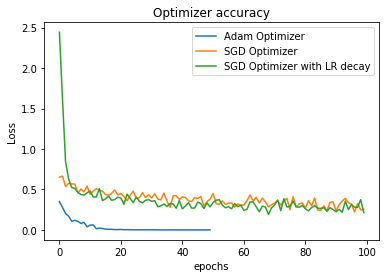

In [100]:
#Loss Curve
#for i in range(3):
plt.plot(losslist1,label = 'Adam Optimizer')
plt.plot(losslist2,label = 'SGD Optimizer')
plt.plot(losslist3,label = 'SGD Optimizer with LR decay')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('Optimizer accuracy')
plt.legend(loc = 'upper right')
#plt.show()
plt.savefig('./image/optimizer_loss.png',dpi = 200)

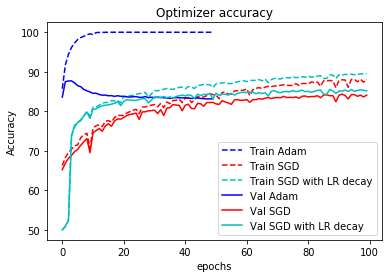

In [101]:
plt.plot(trainacc1,'b--',label = 'Train Adam')
plt.plot(trainacc2,'r--',label = 'Train SGD')
plt.plot(trainacc3,'c--',label = 'Train SGD with LR decay')
plt.plot(valacc1,label = 'Val Adam',color='Blue')
plt.plot(valacc2,label = 'Val SGD',color='Red')
plt.plot(valacc3,label = 'Val SGD with LR decay',color = 'c')

plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Optimizer accuracy')
plt.legend(loc = 'lower right')
#plt.show()
plt.savefig('./image/optimizer.png',dpi = 200)

In [ ]:
plt.plot(losslist1,label = 'Adam Optimizer')
plt.plot(losslist2,label = 'SGD Optimizer')
plt.plot(losslist3,label = 'SGD Optimizer with LR decay')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('Optimizer accuracy')
plt.legend(loc = 'upper right')
plt.show()

In [60]:
# embedding size
for emb in [20,100,200,300,400,500]:
    hypterparameter_test(learning_rate = 0.01, emb_dim = emb, SGD=False, momentum=0,num_epochs = 8)



Epoch: [1/8], Step: [101/125], Validation Acc: 74.86
Epoch: [2/8], Step: [101/125], Validation Acc: 85.42
Epoch: [3/8], Step: [101/125], Validation Acc: 86.96
Epoch: [4/8], Step: [101/125], Validation Acc: 87.66
Epoch: [5/8], Step: [101/125], Validation Acc: 88.16
Epoch: [6/8], Step: [101/125], Validation Acc: 88.2
Epoch: [7/8], Step: [101/125], Validation Acc: 87.78
Epoch: [8/8], Step: [101/125], Validation Acc: 87.36
Epoch: [1/8], Step: [101/125], Validation Acc: 83.04
Epoch: [2/8], Step: [101/125], Validation Acc: 87.68
Epoch: [3/8], Step: [101/125], Validation Acc: 88.2
Epoch: [4/8], Step: [101/125], Validation Acc: 87.2
Epoch: [5/8], Step: [101/125], Validation Acc: 87.06
Epoch: [6/8], Step: [101/125], Validation Acc: 86.28
Epoch: [7/8], Step: [101/125], Validation Acc: 86.06
Epoch: [8/8], Step: [101/125], Validation Acc: 85.62
Epoch: [1/8], Step: [101/125], Validation Acc: 85.58
Epoch: [2/8], Step: [101/125], Validation Acc: 87.94
Epoch: [3/8], Step: [101/125], Validation Acc: 87

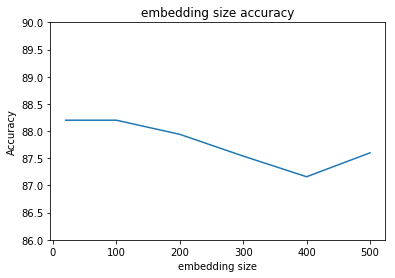

In [104]:
emb_acc = [88.20,88.20,87.94,87.54,87.16,87.60]
plt.plot([20,100,200,300,400,500],emb_acc)
plt.xlabel('embedding size')
plt.ylabel('Accuracy')
plt.ylim([86,90])
#plt.legend(loc = 'upper right')
plt.title('embedding size accuracy')
#plt.show()
plt.savefig('./image/embedding.png',dpi = 200)

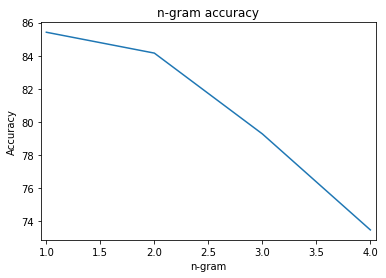

In [103]:
# n-gram:
n_gram_acc = [85.42,84.16,79.28,73.48]

plt.plot([1,2,3,4],n_gram_acc)
plt.xlabel('n-gram')
plt.ylabel('Accuracy')
plt.xlim([0.95,4.05])
#plt.legend(loc = 'upper right')
plt.title('n-gram accuracy')
#plt.show()
plt.savefig('./image/n_gram.png',dpi = 200)

In [ ]:
# 3 correct 3 incorrect

In [126]:
train_data_indices,val_data_indices,test_data_indices,token2id,id2token = datagenerater(train_pos = './rmstop/train_pos1_tokens.p',train_neg = './rmstop/train_neg1_tokens.p',test_pos = './rmstop/test_pos1_tokens.p',test_neg = './rmstop/test_neg1_tokens.p',max_vocab_size = 25000)
train_targets = [1]*10000+[0]*10000
val_targets = [1]*2500+[0]*2500
test_targets = [1]*12500+[0]*12500

BATCH_SIZE = 160
train_dataset = NewsGroupDataset(train_data_indices, train_targets)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)

val_dataset = NewsGroupDataset(val_data_indices, val_targets)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=False)


Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000
Token id 8708 ; token counted
Token counted; token id 8708
Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000


In [129]:
def hypterparameter_test(learning_rate = 0.01, emb_dim = 100, SGD=False, momentum=0,num_epochs = 3):
    
      
    class BagOfWords(nn.Module):
        """
        BagOfWords classification model
        """
        def __init__(self, vocab_size, emb_dim):
            """
            @param vocab_size: size of the vocabulary. 
            @param emb_dim: size of the word embedding
            """
            super(BagOfWords, self).__init__()
            # pay attention to padding_idx 
            self.embed = nn.Embedding(vocab_size, emb_dim, padding_idx=0)
            self.linear = nn.Linear(emb_dim,20)

        def forward(self, data, length):
            """
            @param data: matrix of size (batch_size, max_sentence_length). Each row in data represents a 
                review that is represented using n-gram index. Note that they are padded to have same length.
            @param length: an int tensor of size (batch_size), which represents the non-trivial (excludes padding)
                length of each sentences in the data.
            """
            out = self.embed(data)
            out = torch.sum(out, dim=1)
            out /= length.view(length.size()[0],1).expand_as(out).float()

            # return logits
            out = self.linear(out.float())
            return out
    
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    
    model = BagOfWords(len(id2token), emb_dim)
    model.cuda()

    # Criterion and Optimizer
    criterion = torch.nn.CrossEntropyLoss() 
    if SGD == False:
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    else:
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
        optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0, dampening=0, weight_decay=0, nesterov=False)
    
    def test_model(loader, model):
        """
        Help function that tests the model's performance on a dataset
        @param: loader - data loader for the dataset to test against
        """
        correct = 0
        total = 0
        model.eval()
        for data, lengths, labels in loader:
            data,lengths,labels = data.to(device), lengths.to(device), labels.to(device)
            data_batch, length_batch, label_batch = data, lengths, labels
            outputs = F.softmax(model(data_batch, length_batch), dim=1)
            predicted = outputs.max(1, keepdim=True)[1]

            total += labels.size(0)
            correct += predicted.eq(labels.view_as(predicted)).sum().item()
        return (100 * correct / total)
    
    maxval = 0
    maxmodel = model
    
    for epoch in range(num_epochs):
        for i, (data, lengths, labels) in enumerate(train_loader):
            data,lengths,labels = data.to(device), lengths.to(device), labels.to(device)
            model.train()
            data_batch, length_batch, label_batch = data, lengths, labels
            optimizer.zero_grad()
            outputs = model(data_batch, length_batch)
            loss = criterion(outputs, label_batch)
            loss.backward()
            optimizer.step()
            # validate every 100 iterations
            if i > 0 and i % 100 == 0:
                # validate
                val_acc = test_model(val_loader, model)
                print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
                           epoch+1, num_epochs, i+1, len(train_loader), val_acc))
        if val_acc > maxval:
            maxmodel = model
    return maxmodel
        #print('Test ACC:',test_model(test_loader,model))

In [130]:
bestmodel = hypterparameter_test(learning_rate = 0.005, emb_dim = 100, SGD=False, momentum=0,num_epochs = 60)

Epoch: [1/60], Step: [101/125], Validation Acc: 80.84
Epoch: [2/60], Step: [101/125], Validation Acc: 87.68
Epoch: [3/60], Step: [101/125], Validation Acc: 88.52
Epoch: [4/60], Step: [101/125], Validation Acc: 88.5
Epoch: [5/60], Step: [101/125], Validation Acc: 88.48
Epoch: [6/60], Step: [101/125], Validation Acc: 88.5
Epoch: [7/60], Step: [101/125], Validation Acc: 88.34
Epoch: [8/60], Step: [101/125], Validation Acc: 88.02
Epoch: [9/60], Step: [101/125], Validation Acc: 87.64
Epoch: [10/60], Step: [101/125], Validation Acc: 87.6
Epoch: [11/60], Step: [101/125], Validation Acc: 87.48
Epoch: [12/60], Step: [101/125], Validation Acc: 87.58
Epoch: [13/60], Step: [101/125], Validation Acc: 87.54
Epoch: [14/60], Step: [101/125], Validation Acc: 87.3
Epoch: [15/60], Step: [101/125], Validation Acc: 87.38
Epoch: [16/60], Step: [101/125], Validation Acc: 87.3
Epoch: [17/60], Step: [101/125], Validation Acc: 87.5
Epoch: [18/60], Step: [101/125], Validation Acc: 87.36
Epoch: [19/60], Step: [10

In [138]:
val_dataset = NewsGroupDataset(val_data_indices, val_targets)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=1,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=False)


In [156]:
def test_model(loader, model):
    """
    Help function that tests the model's performance on a dataset
    @param: loader - data loader for the dataset to test against
    """
    correct = 0
    total = 0
    model.eval()
    predictlist = []
    datalist = []
    labellist = []
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    for data, lengths, labels in loader:
        data,lengths,labels = data.to(device), lengths.to(device), labels.to(device)
        data_batch, length_batch, label_batch = data, lengths, labels
        outputs = F.softmax(model(data_batch, length_batch), dim=1)
        predicted = outputs.max(1, keepdim=True)[1]
        
        predictlist.append(predicted)
        datalist.append(data)
        labellist.append(labels)

    return predictlist,datalist,labellist

In [157]:
prelist,datalist,labellist = test_model(val_loader,bestmodel)

In [316]:
prelist[10]

tensor([[1]], device='cuda:0')

In [317]:
val_pos[10]

['this',
 'movie',
 'is',
 'a',
 'lot',
 'of',
 'fun',
 'the',
 'actors',
 'really',
 'make',
 'the',
 'movie',
 'go',
 'the',
 'distance',
 'though',
 'without',
 'giving',
 'away',
 'the',
 'plot',
 'i',
 'would',
 'describe',
 'it',
 'as',
 'a',
 'new',
 'princess',
 'bride',
 'cult',
 'favorite',
 'that',
 'should',
 'stand',
 'the',
 'test',
 'of',
 'time',
 'you',
 'get',
 'to',
 'see',
 'a',
 'whole',
 'different',
 'side',
 'to',
 'robert',
 'deniro',
 'in',
 'this',
 'movie',
 'worth',
 'the',
 'price',
 'of',
 'admission',
 'just',
 'for',
 'that',
 'all',
 'the',
 'elements',
 'are',
 'there',
 'from',
 'adventure',
 'to',
 'romance',
 'and',
 'well',
 'placed',
 'comedy.<br',
 '/><br',
 '/>people',
 'of',
 'all',
 'ages',
 'will',
 'enjoy',
 'it',
 'my',
 'parents',
 'even',
 'did',
 'good',
 'special',
 'effects',
 'may',
 'be',
 'scary',
 'for',
 'the',
 'little',
 'ones',
 'good',
 'date',
 'movie',
 'great',
 'for',
 'some',
 'escapism.<br',
 '/><br',
 '/>deserves',
 'a

In [287]:
valposdata = []
#valnegdata = []
i = 0
for filename in glob.glob(trainpos+'*.txt'):
    valposdata.append(filename)

In [319]:
text_file = open(valposdata[6632], "r")
print(text_file.readlines()[0])
print(valposdata[6632])

This movie is a lot of fun. The actors really make the movie go the distance though. Without giving away the plot, I would describe it as a new Princess Bride cult favorite that should stand the test of time. You get to see a whole different side to Robert DeNiro in this movie! (Worth the price of admission just for that!) All the elements are there from adventure to romance, and well placed comedy.<br /><br />People of all ages will enjoy it. (My parents even did!) Good special effects, may be scary for the little ones. Good date movie. Great for some escapism.<br /><br />Deserves an A. (Hope it does well at the box office)
./aclImdb/train/pos/628_9.txt


In [269]:
index = np.arange(12500)
np.random.seed(1234)
np.random.shuffle(index)
pos_index = index.copy()
np.random.seed(2234)
np.random.shuffle(index)
neg_index = index.copy()

In [318]:
pos_index[10010]

6632

In [285]:
val_data_tokens[3014]

['this',
 'is',
 'just',
 'a',
 'terrible',
 'comedy',
 '--',
 'it',
 'really',
 'is',
 'a',
 'bad',
 'film',
 'there',
 'are',
 'no',
 'funny',
 'elements',
 'no',
 'jokes',
 'that',
 'are',
 'funny',
 'i',
 'do',
 "n't",
 'know',
 'how',
 'some',
 'people',
 'can',
 'claim',
 'this',
 'dismal',
 'short',
 'film',
 'could',
 'be',
 'smartest',
 'or',
 'quality',
 'perhaps',
 'if',
 'its',
 'the',
 'only',
 'film',
 'that',
 'a',
 'person',
 'has',
 'seen',
 'you',
 'can',
 'make',
 'that',
 'claim',
 'of',
 'the',
 'brothers',
 'but',
 'i',
 'have',
 'seen',
 'thousands',
 'of',
 'better',
 'films',
 'namely',
 'leonard',
 'part',
 'six',
 'now',
 'that',
 "'s",
 'funny',
 'i',
 'do',
 "n't",
 'know',
 'how',
 'the',
 'brothers',
 'is',
 'even',
 'considered',
 'eligible',
 'to',
 'be',
 'listed',
 'on',
 'the',
 'internet',
 'movie',
 'database',
 'its',
 'more',
 'like',
 'a',
 'home',
 'video',
 'than',
 'an',
 'actual',
 'film.<br',
 '/><br',
 '/>jokes',
 'aside',
 'just',
 'skip'

In [320]:
#extra_point

In [333]:
# First import torch related libraries
import torch
import torch.nn as nn
import torch.nn.functional as F

class BagOfWords(nn.Module):
    """
    BagOfWords classification model
    """
    def __init__(self, vocab_size, emb_dim):
        """
        @param vocab_size: size of the vocabulary. 
        @param emb_dim: size of the word embedding
        """
        super(BagOfWords, self).__init__()
        # pay attention to padding_idx 
        self.embed = nn.Embedding(vocab_size, emb_dim, padding_idx=0)
        self.linear = nn.Linear(emb_dim,8)
    
    def forward(self, data, length):
        """
        
        @param data: matrix of size (batch_size, max_sentence_length). Each row in data represents a 
            review that is represented using n-gram index. Note that they are padded to have same length.
        @param length: an int tensor of size (batch_size), which represents the non-trivial (excludes padding)
            length of each sentences in the data.
        """
        out = self.embed(data)
        out = torch.sum(out, dim=1)
        out /= length.view(length.size()[0],1).expand_as(out).float()
     
        # return logits
        out = self.linear(out.float())
        return out

# emb_dim = 100
# model = BagOfWords(len(id2token), emb_dim)

In [332]:
def datagenerater(train_pos,train_neg,test_pos,test_neg,max_vocab_size = 10000):
    
    train_pos1_tokens = pkl.load(open(train_pos, "rb"))
    train_neg1_tokens = pkl.load(open(train_neg, "rb"))
    test_pos1_tokens = pkl.load(open(test_pos, "rb"))
    test_neg1_tokens = pkl.load(open(test_neg, "rb"))
    
    index = np.arange(12500)
    np.random.seed(1234)
    np.random.shuffle(index)
    pos_index = index.copy()
    np.random.seed(2234)
    np.random.shuffle(index)
    neg_index = index.copy()
    
    train_pos = [train_pos1_tokens[i] for i in pos_index[:10000]]
    val_pos = [train_pos1_tokens[i] for i in pos_index[10000:]]
    train_neg = [train_neg1_tokens[i] for i in neg_index[:10000]]
    val_neg = [train_neg1_tokens[i] for i in neg_index[10000:]]
    

    train_data_tokens = train_pos + train_neg
    val_data_tokens = val_pos + val_neg
    test_data_tokens = test_pos1_tokens + test_neg1_tokens

    print ("Train dataset size is {}".format(len(train_data_tokens)))
    print ("Val dataset size is {}".format(len(val_data_tokens)))
    print ("Test dataset size is {}".format(len(test_data_tokens)))
    
    all_train_tokens = []
    for tokens in train_data_tokens:
        all_train_tokens += tokens
    
    
    # save index 0 for unk and 1 for pad
    PAD_IDX = 0
    UNK_IDX = 1

    def build_vocab(all_tokens):
        # Returns:
        # id2token: list of tokens, where id2token[i] returns token that corresponds to token i
        # token2id: dictionary where keys represent tokens and corresponding values represent indices
        token_counter = Counter(all_tokens)
        vocab, count = zip(*token_counter.most_common(max_vocab_size))
        id2token = list(vocab)
        token2id = dict(zip(vocab, range(2,2+len(vocab)))) 
        id2token = ['<pad>', '<unk>'] + id2token
        token2id['<pad>'] = PAD_IDX 
        token2id['<unk>'] = UNK_IDX
        return token2id, id2token

    token2id, id2token = build_vocab(all_train_tokens)
    
    # Lets check the dictionary by loading random token from it
    random_token_id = random.randint(0, len(id2token)-1)
    random_token = id2token[random_token_id]

    print ("Token id {} ; token {}".format(random_token_id, id2token[random_token_id]))
    print ("Token {}; token id {}".format(random_token, token2id[random_token]))
    
    def token2index_dataset(tokens_data):
        indices_data = []
        for tokens in tokens_data:
            index_list = [token2id[token] if token in token2id else UNK_IDX for token in tokens]
            indices_data.append(index_list)
        return indices_data
    
    train_data_indices = token2index_dataset(train_data_tokens)
    val_data_indices = token2index_dataset(val_data_tokens)
    test_data_indices = token2index_dataset(test_data_tokens)
    
    print ("Train dataset size is {}".format(len(train_data_indices)))
    print ("Val dataset size is {}".format(len(val_data_indices)))
    print ("Test dataset size is {}".format(len(test_data_indices)))
    
    return train_data_indices,val_data_indices,test_data_indices,token2id,id2token

In [ ]:
trainpos = './aclImdb/train/pos/'
trainneg = './aclImdb/train/neg/'
tsetpos = './aclImdb/test/pos/'
testneg = './aclImdb/test/neg/'

In [358]:
pos_label = []
neg_label = []
test_pos_label = []
test_neg_label = []

for filename in glob.glob(trainpos+'*.txt'):
    pos_label.append(int(filename[-5]))
    
for filename in glob.glob(trainneg+'*.txt'):
    neg_label.append(int(filename[-5]))
    
for filename in glob.glob(tsetpos+'*.txt'):
    test_pos_label.append(int(filename[-5]))

for filename in glob.glob(testneg+'*.txt'):
    test_neg_label.append(int(filename[-5]))

index = np.arange(12500)
np.random.seed(1234)
np.random.shuffle(index)
pos_index = index.copy()
np.random.seed(2234)
np.random.shuffle(index)
neg_index = index.copy()

train_pos_label = [pos_label[i] for i in pos_index[:10000]]
val_pos_label = [pos_label[i] for i in pos_index[10000:]]
train_neg_label = [neg_label[i] for i in neg_index[:10000]]
val_neg_label = [neg_label[i] for i in neg_index[10000:]]

train_targets = train_pos_label + train_neg_label
val_targets = val_pos_label + val_neg_label
test_targets = test_pos_label + test_neg_label

In [340]:
len(train_targets),len(val_targets)

(20000, 5000)

In [334]:
import torch
import torch.nn as nn
import torch.nn.functional as F

def hypterparameter_test(learning_rate = 0.01, emb_dim = 100, SGD=False, momentum=0,num_epochs = 3):
    
      
    class BagOfWords(nn.Module):
        """
        BagOfWords classification model
        """
        def __init__(self, vocab_size, emb_dim):
            """
            @param vocab_size: size of the vocabulary. 
            @param emb_dim: size of the word embedding
            """
            super(BagOfWords, self).__init__()
            # pay attention to padding_idx 
            self.embed = nn.Embedding(vocab_size, emb_dim, padding_idx=0)
            self.linear = nn.Linear(emb_dim,20)

        def forward(self, data, length):
            """
            @param data: matrix of size (batch_size, max_sentence_length). Each row in data represents a 
                review that is represented using n-gram index. Note that they are padded to have same length.
            @param length: an int tensor of size (batch_size), which represents the non-trivial (excludes padding)
                length of each sentences in the data.
            """
            out = self.embed(data)
            out = torch.sum(out, dim=1)
            out /= length.view(length.size()[0],1).expand_as(out).float()

            # return logits
            out = self.linear(out.float())
            return out
    
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    
    model = BagOfWords(len(id2token), emb_dim)
    model.cuda()

    # Criterion and Optimizer
    criterion = torch.nn.CrossEntropyLoss() 
    if SGD == False:
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    else:
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
        optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0, dampening=0, weight_decay=0, nesterov=False)
    
    def test_model(loader, model):
        """
        Help function that tests the model's performance on a dataset
        @param: loader - data loader for the dataset to test against
        """
        correct = 0
        total = 0
        model.eval()
        for data, lengths, labels in loader:
            data,lengths,labels = data.to(device), lengths.to(device), labels.to(device)
            data_batch, length_batch, label_batch = data, lengths, labels
            outputs = F.softmax(model(data_batch, length_batch), dim=1)
            predicted = outputs.max(1, keepdim=True)[1]

            total += labels.size(0)
            correct += predicted.eq(labels.view_as(predicted)).sum().item()
        return (100 * correct / total)

    for epoch in range(num_epochs):
        for i, (data, lengths, labels) in enumerate(train_loader):
            data,lengths,labels = data.to(device), lengths.to(device), labels.to(device)
            model.train()
            data_batch, length_batch, label_batch = data, lengths, labels
            optimizer.zero_grad()
            outputs = model(data_batch, length_batch)
            loss = criterion(outputs, label_batch)
            loss.backward()
            optimizer.step()
            # validate every 100 iterations
            if i > 0 and i % 100 == 0:
                # validate
                val_acc = test_model(val_loader, model)
                print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
                           epoch+1, num_epochs, i+1, len(train_loader), val_acc))
        print('Test ACC:',test_model(test_loader,model))

In [359]:
train_data_indices,val_data_indices,test_data_indices,token2id,id2token = datagenerater(train_pos = './rmstop/train_pos1_tokens.p',train_neg = './rmstop/train_neg1_tokens.p',test_pos = './rmstop/test_pos1_tokens.p',test_neg = './rmstop/test_neg1_tokens.p',max_vocab_size = 25000)

 
#train_targets = [1]*10000+[0]*10000
#val_targets = [1]*2500+[0]*2500
#test_targets = [1]*12500+[0]*12500
    
BATCH_SIZE = 160
train_dataset = NewsGroupDataset(train_data_indices, train_targets)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)

val_dataset = NewsGroupDataset(val_data_indices, val_targets)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)

test_dataset = NewsGroupDataset(test_data_indices, test_targets)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=False)


Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000
Token id 24536 ; token rainman
Token rainman; token id 24536
Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000


In [362]:
for emb_dim in [100,512]:
    for lr in [0.01,0.001]:
        print('emb size: {}, lr: {}, SGD: {}, mom: {}'.format( 
                           emb_dim, lr, False, 0))
        hypterparameter_test(learning_rate = lr, emb_dim = emb_dim, SGD=False, momentum=0,num_epochs = 60)

emb size: 100, lr: 0.01, SGD: False, mom: 0
Epoch: [1/60], Step: [101/125], Validation Acc: 40.02
Test ACC: 40.108
Epoch: [2/60], Step: [101/125], Validation Acc: 43.54
Test ACC: 41.712
Epoch: [3/60], Step: [101/125], Validation Acc: 43.74
Test ACC: 40.656
Epoch: [4/60], Step: [101/125], Validation Acc: 42.06
Test ACC: 39.804
Epoch: [5/60], Step: [101/125], Validation Acc: 41.24
Test ACC: 37.96
Epoch: [6/60], Step: [101/125], Validation Acc: 40.6
Test ACC: 36.92
Epoch: [7/60], Step: [101/125], Validation Acc: 40.82
Test ACC: 36.58
Epoch: [8/60], Step: [101/125], Validation Acc: 40.3
Test ACC: 36.668
Epoch: [9/60], Step: [101/125], Validation Acc: 39.9
Test ACC: 36.788
Epoch: [10/60], Step: [101/125], Validation Acc: 39.42
Test ACC: 36.58
Epoch: [11/60], Step: [101/125], Validation Acc: 39.7
Test ACC: 36.364
Epoch: [12/60], Step: [101/125], Validation Acc: 39.42
Test ACC: 36.308
Epoch: [13/60], Step: [101/125], Validation Acc: 39.54
Test ACC: 36.348
Epoch: [14/60], Step: [101/125], Vali

Test ACC: 37.132
Epoch: [55/60], Step: [101/125], Validation Acc: 39.72
Test ACC: 37.176
Epoch: [56/60], Step: [101/125], Validation Acc: 39.76
Test ACC: 37.08
Epoch: [57/60], Step: [101/125], Validation Acc: 39.86
Test ACC: 37.02
Epoch: [58/60], Step: [101/125], Validation Acc: 39.7
Test ACC: 37.056
Epoch: [59/60], Step: [101/125], Validation Acc: 39.68
Test ACC: 36.892
Epoch: [60/60], Step: [101/125], Validation Acc: 39.32
Test ACC: 36.984
emb size: 512, lr: 0.01, SGD: False, mom: 0
Epoch: [1/60], Step: [101/125], Validation Acc: 42.12
Test ACC: 42.152
Epoch: [2/60], Step: [101/125], Validation Acc: 42.76
Test ACC: 40.496
Epoch: [3/60], Step: [101/125], Validation Acc: 41.72
Test ACC: 36.844
Epoch: [4/60], Step: [101/125], Validation Acc: 39.52
Test ACC: 36.924
Epoch: [5/60], Step: [101/125], Validation Acc: 39.42
Test ACC: 36.98
Epoch: [6/60], Step: [101/125], Validation Acc: 39.5
Test ACC: 36.54
Epoch: [7/60], Step: [101/125], Validation Acc: 39.44
Test ACC: 36.552
Epoch: [8/60], S

Test ACC: 36.528
Epoch: [49/60], Step: [101/125], Validation Acc: 39.88
Test ACC: 36.524
Epoch: [50/60], Step: [101/125], Validation Acc: 39.64
Test ACC: 36.412
Epoch: [51/60], Step: [101/125], Validation Acc: 40.0
Test ACC: 36.5
Epoch: [52/60], Step: [101/125], Validation Acc: 39.72
Test ACC: 36.552
Epoch: [53/60], Step: [101/125], Validation Acc: 39.78
Test ACC: 36.52
Epoch: [54/60], Step: [101/125], Validation Acc: 39.9
Test ACC: 36.452
Epoch: [55/60], Step: [101/125], Validation Acc: 39.82
Test ACC: 36.384
Epoch: [56/60], Step: [101/125], Validation Acc: 40.02
Test ACC: 36.44
Epoch: [57/60], Step: [101/125], Validation Acc: 39.62
Test ACC: 36.46
Epoch: [58/60], Step: [101/125], Validation Acc: 39.84
Test ACC: 36.352
Epoch: [59/60], Step: [101/125], Validation Acc: 39.66
Test ACC: 36.476
Epoch: [60/60], Step: [101/125], Validation Acc: 39.44
Test ACC: 36.36
